In [1]:
import cv2 
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from skimage import color
import pandas as pd
import glob
from numpy.linalg import norm
from shapely import geometry
from SiftFunctions import *
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats.kde import gaussian_kde
import random
import seaborn as sns
import matplotlib.image as mpimg 
from tqdm import tqdm

%matplotlib inline

In [ ]:
"""
This notebook detects the original image in online reproductions, identifies SIFT keypoints and plots their frequencies. The script requires preprocessed
images. 
"""

In [8]:
def SKPDF(photo,sample_size):
    img1 = cv2.imread(f'F:/react-data/iconic/image-analysis/test_results/{photo}/original/original.jpg')
    dc = []
    samp = random.sample(os.listdir(f'F:/react-data/iconic/image-analysis/test_results/{photo}/preproc'),sample_size)
    samp = [os.path.join(f'F:/react-data/iconic/image-analysis/test_results/{photo}/preproc',x).replace("\\","/") for x in samp]
    for img_fn in tqdm(samp):
        img2 = cv2.imread(img_fn)
        try:
            src_pts, dst_pts = sifter(img1,img2)
            dc += src_pts
        except Exception as e:
            #print(img_fn)
            #print(e)
            continue
    map_img = mpimg.imread(f'F:/react-data/iconic/image-analysis/test_results/{photo}/original/original.jpg')  #path to original image, preprocessed
    dcdf = pd.DataFrame(dc,columns="x y".split(' '))
    dcdf = dcdf.round(0)
    dcdf['n'] = 1
    dcdf = dcdf.groupby(['x','y']).sum().reset_index()
    
    fig = plt.figure(dpi=100)
    sns.kdeplot(dcdf.x, dcdf.y, cmap='viridis', shade=True,alpha=0.5)
    plt.imshow(map_img, zorder=0,alpha=0.9, cmap="gray")#extent=[0.5, 8.0, 1.0, 7.0]
    directory_cleaned = f"F:/react-data/iconic/image-analysis/test_results/{photo}/plots"
    if not os.path.exists(directory_cleaned):
        os.makedirs(directory_cleaned)
    plt.savefig(f"F:/react-data/iconic/image-analysis/test_results/{photo}/plots/area-kde-s{sample_size}.png",dpi=250) #set output folder
    dcdf.to_csv(f'F:/react-data/iconic/image-analysis/test_results/{photo}/plots/sift-keypoints-s{sample_size}.csv',index=False) #save dataframe
    plt.show()

  4%|██▉                                                                             | 37/1000 [00:03<01:47,  8.96it/s]

Not enough matches are found - 4/10


  7%|█████▊                                                                          | 72/1000 [00:07<01:46,  8.73it/s]

Not enough matches are found - 6/10


  8%|██████▍                                                                         | 81/1000 [00:08<01:34,  9.68it/s]

Not enough matches are found - 10/10


 15%|███████████▉                                                                   | 151/1000 [00:14<01:21, 10.37it/s]

Not enough matches are found - 10/10


 16%|████████████▋                                                                  | 161/1000 [00:15<01:19, 10.60it/s]

Not enough matches are found - 10/10


 17%|█████████████▏                                                                 | 167/1000 [00:16<01:15, 11.06it/s]

Not enough matches are found - 10/10


 18%|██████████████▏                                                                | 180/1000 [00:17<01:25,  9.58it/s]

Not enough matches are found - 9/10


 20%|███████████████▍                                                               | 195/1000 [00:19<01:22,  9.81it/s]

Not enough matches are found - 8/10


 20%|███████████████▉                                                               | 201/1000 [00:19<01:21,  9.75it/s]

Not enough matches are found - 5/10


 22%|█████████████████▏                                                             | 217/1000 [00:21<01:24,  9.24it/s]

Not enough matches are found - 4/10


 22%|█████████████████▎                                                             | 219/1000 [00:21<01:19,  9.76it/s]

Not enough matches are found - 7/10


 22%|█████████████████▌                                                             | 223/1000 [00:22<01:15, 10.22it/s]

Not enough matches are found - 10/10


 24%|███████████████████▎                                                           | 245/1000 [00:24<01:50,  6.81it/s]

Not enough matches are found - 7/10


 26%|████████████████████▏                                                          | 256/1000 [00:26<01:30,  8.20it/s]

Not enough matches are found - 4/10


 28%|█████████████████████▉                                                         | 277/1000 [00:28<01:34,  7.64it/s]

Not enough matches are found - 10/10


 29%|██████████████████████▊                                                        | 288/1000 [00:30<01:50,  6.42it/s]

Not enough matches are found - 9/10


 29%|██████████████████████▉                                                        | 291/1000 [00:30<01:40,  7.08it/s]

Not enough matches are found - 10/10


 30%|███████████████████████▍                                                       | 297/1000 [00:31<01:24,  8.34it/s]

Not enough matches are found - 9/10


 31%|████████████████████████▍                                                      | 309/1000 [00:32<01:05, 10.55it/s]

Not enough matches are found - 8/10


 31%|████████████████████████▌                                                      | 311/1000 [00:32<01:07, 10.21it/s]

Not enough matches are found - 9/10


 33%|█████████████████████████▊                                                     | 326/1000 [00:34<01:07,  9.96it/s]

Not enough matches are found - 10/10


 34%|██████████████████████████▋                                                    | 338/1000 [00:35<01:07,  9.87it/s]

Not enough matches are found - 4/10


 34%|██████████████████████████▊                                                    | 340/1000 [00:35<01:00, 10.87it/s]

Not enough matches are found - 2/10


 36%|████████████████████████████                                                   | 356/1000 [00:36<01:03, 10.10it/s]

Not enough matches are found - 4/10


 37%|█████████████████████████████                                                  | 368/1000 [00:38<00:59, 10.61it/s]

Not enough matches are found - 4/10


 38%|█████████████████████████████▊                                                 | 378/1000 [00:38<00:56, 11.00it/s]

Not enough matches are found - 6/10


 39%|██████████████████████████████▍                                                | 386/1000 [00:39<00:55, 11.11it/s]

Not enough matches are found - 6/10


 39%|███████████████████████████████▏                                               | 394/1000 [00:40<00:53, 11.41it/s]

Not enough matches are found - 2/10


 40%|███████████████████████████████▊                                               | 402/1000 [00:41<00:59, 10.04it/s]

Not enough matches are found - 10/10


 43%|██████████████████████████████████▎                                            | 434/1000 [00:44<01:05,  8.68it/s]

Not enough matches are found - 4/10


 45%|███████████████████████████████████▏                                           | 446/1000 [00:45<00:53, 10.28it/s]

Not enough matches are found - 7/10


 45%|███████████████████████████████████▋                                           | 452/1000 [00:46<00:46, 11.67it/s]

Not enough matches are found - 7/10


 46%|████████████████████████████████████                                           | 456/1000 [00:46<00:47, 11.41it/s]

Not enough matches are found - 7/10


 50%|███████████████████████████████████████▉                                       | 505/1000 [00:51<00:55,  8.92it/s]

Not enough matches are found - 4/10


 51%|████████████████████████████████████████▏                                      | 509/1000 [00:51<00:51,  9.52it/s]

Not enough matches are found - 10/10


 52%|█████████████████████████████████████████▏                                     | 521/1000 [00:53<00:42, 11.17it/s]

Not enough matches are found - 5/10


 52%|█████████████████████████████████████████▍                                     | 525/1000 [00:53<00:41, 11.36it/s]

Not enough matches are found - 10/10


 54%|██████████████████████████████████████████▎                                    | 536/1000 [00:54<00:50,  9.24it/s]

Not enough matches are found - 4/10
Not enough matches are found - 10/10


 55%|███████████████████████████████████████████▊                                   | 554/1000 [00:56<00:43, 10.17it/s]

Not enough matches are found - 6/10


 56%|████████████████████████████████████████████                                   | 558/1000 [00:56<00:43, 10.27it/s]

Not enough matches are found - 10/10


 58%|█████████████████████████████████████████████▌                                 | 577/1000 [00:58<00:54,  7.75it/s]

Not enough matches are found - 6/10


 60%|███████████████████████████████████████████████▋                               | 603/1000 [01:01<00:45,  8.81it/s]

Not enough matches are found - 9/10


 62%|█████████████████████████████████████████████████▍                             | 625/1000 [01:03<00:38,  9.77it/s]

Not enough matches are found - 2/10


 64%|██████████████████████████████████████████████████▎                            | 637/1000 [01:05<00:36,  9.84it/s]

Not enough matches are found - 4/10


 65%|███████████████████████████████████████████████████▍                           | 651/1000 [01:06<00:35,  9.81it/s]

Not enough matches are found - 4/10


 65%|███████████████████████████████████████████████████▌                           | 653/1000 [01:06<00:34, 10.16it/s]

Not enough matches are found - 10/10


 66%|████████████████████████████████████████████████████▏                          | 661/1000 [01:07<00:33, 10.06it/s]

Not enough matches are found - 2/10


 67%|█████████████████████████████████████████████████████                          | 672/1000 [01:08<00:35,  9.35it/s]

Not enough matches are found - 6/10


 70%|███████████████████████████████████████████████████████▎                       | 700/1000 [01:11<00:28, 10.62it/s]

Not enough matches are found - 2/10


 70%|███████████████████████████████████████████████████████▍                       | 702/1000 [01:11<00:27, 10.72it/s]

Not enough matches are found - 8/10


 70%|███████████████████████████████████████████████████████▌                       | 704/1000 [01:11<00:26, 11.02it/s]

Not enough matches are found - 10/10


 72%|████████████████████████████████████████████████████████▋                      | 718/1000 [01:13<00:29,  9.61it/s]

Not enough matches are found - 4/10


 73%|█████████████████████████████████████████████████████████▊                     | 732/1000 [01:14<00:34,  7.70it/s]

Not enough matches are found - 8/10


 75%|███████████████████████████████████████████████████████████▏                   | 749/1000 [01:17<00:31,  8.08it/s]

Not enough matches are found - 7/10


 77%|████████████████████████████████████████████████████████████▉                  | 771/1000 [01:20<00:30,  7.60it/s]

Not enough matches are found - 8/10


 77%|█████████████████████████████████████████████████████████████                  | 773/1000 [01:20<00:27,  8.28it/s]

Not enough matches are found - 4/10
Not enough matches are found - 1/10


 78%|█████████████████████████████████████████████████████████████▏                 | 775/1000 [01:20<00:23,  9.45it/s]

Not enough matches are found - 10/10


 78%|█████████████████████████████████████████████████████████████▌                 | 780/1000 [01:20<00:26,  8.28it/s]

Not enough matches are found - 4/10


 79%|██████████████████████████████████████████████████████████████▎                | 789/1000 [01:22<00:27,  7.77it/s]

Not enough matches are found - 6/10


 79%|██████████████████████████████████████████████████████████████▋                | 793/1000 [01:22<00:26,  7.77it/s]

Not enough matches are found - 4/10


 81%|████████████████████████████████████████████████████████████████               | 811/1000 [01:24<00:27,  6.92it/s]

Not enough matches are found - 7/10


 82%|█████████████████████████████████████████████████████████████████              | 823/1000 [01:26<00:23,  7.67it/s]

Not enough matches are found - 7/10


 84%|██████████████████████████████████████████████████████████████████             | 836/1000 [01:27<00:21,  7.59it/s]

Not enough matches are found - 7/10


 84%|██████████████████████████████████████████████████████████████████▊            | 845/1000 [01:29<00:21,  7.37it/s]

Not enough matches are found - 10/10


 87%|████████████████████████████████████████████████████████████████████▋          | 869/1000 [01:32<00:17,  7.29it/s]

Not enough matches are found - 8/10


 88%|█████████████████████████████████████████████████████████████████████▏         | 876/1000 [01:32<00:14,  8.78it/s]

Not enough matches are found - 8/10


 88%|█████████████████████████████████████████████████████████████████████▎         | 878/1000 [01:33<00:13,  8.95it/s]

Not enough matches are found - 6/10


 88%|█████████████████████████████████████████████████████████████████████▉         | 885/1000 [01:33<00:13,  8.39it/s]

Not enough matches are found - 10/10


 90%|███████████████████████████████████████████████████████████████████████▍       | 905/1000 [01:36<00:11,  8.35it/s]

Not enough matches are found - 10/10


 93%|█████████████████████████████████████████████████████████████████████████▏     | 927/1000 [01:38<00:08,  8.80it/s]

Not enough matches are found - 10/10


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 980/1000 [01:45<00:02,  9.00it/s]

Not enough matches are found - 9/10


 99%|██████████████████████████████████████████████████████████████████████████████▎| 992/1000 [01:46<00:00,  8.64it/s]

Not enough matches are found - 4/10


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:47<00:00,  8.44it/s]


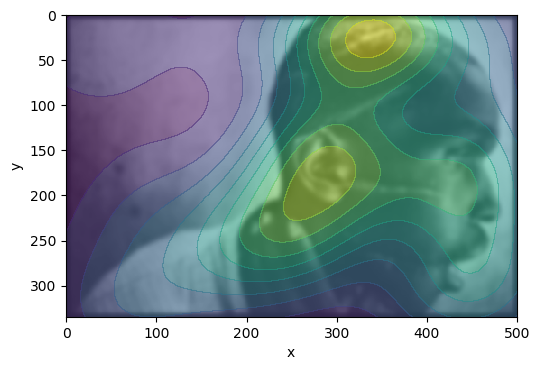

  2%|█▊                                                                              | 22/1000 [00:03<02:45,  5.92it/s]

Not enough matches are found - 9/10


  3%|██▍                                                                             | 31/1000 [00:05<02:21,  6.84it/s]

Not enough matches are found - 10/10


  3%|██▋                                                                             | 33/1000 [00:05<02:31,  6.39it/s]

Not enough matches are found - 7/10


  3%|██▋                                                                             | 34/1000 [00:05<02:22,  6.78it/s]

Not enough matches are found - 7/10


  5%|███▋                                                                            | 46/1000 [00:07<02:38,  6.01it/s]

Not enough matches are found - 8/10


  6%|█████                                                                           | 63/1000 [00:10<02:20,  6.65it/s]

Not enough matches are found - 8/10


  7%|█████▎                                                                          | 67/1000 [00:11<02:29,  6.23it/s]

Not enough matches are found - 10/10


  7%|█████▊                                                                          | 72/1000 [00:11<02:43,  5.67it/s]

Not enough matches are found - 8/10


 10%|███████▉                                                                       | 101/1000 [00:16<02:26,  6.14it/s]

Not enough matches are found - 6/10


 12%|█████████▏                                                                     | 116/1000 [00:19<02:36,  5.65it/s]

Not enough matches are found - 8/10


 12%|█████████▋                                                                     | 123/1000 [00:20<02:24,  6.07it/s]

Not enough matches are found - 10/10


 13%|██████████▌                                                                    | 134/1000 [00:22<02:12,  6.55it/s]

Not enough matches are found - 5/10


 14%|███████████▏                                                                   | 141/1000 [00:23<02:25,  5.89it/s]

Not enough matches are found - 6/10


 16%|████████████▉                                                                  | 163/1000 [00:27<02:37,  5.30it/s]

Not enough matches are found - 8/10


 18%|██████████████▌                                                                | 185/1000 [00:30<02:13,  6.08it/s]

Not enough matches are found - 8/10


 19%|██████████████▉                                                                | 189/1000 [00:31<01:56,  6.94it/s]

Not enough matches are found - 7/10


 20%|███████████████▊                                                               | 200/1000 [00:33<02:05,  6.37it/s]

Not enough matches are found - 6/10


 22%|████████████████▉                                                              | 215/1000 [00:35<02:04,  6.32it/s]

Not enough matches are found - 9/10


 22%|█████████████████▍                                                             | 221/1000 [00:36<02:00,  6.46it/s]

Not enough matches are found - 4/10


 23%|██████████████████▍                                                            | 234/1000 [00:38<02:01,  6.29it/s]

Not enough matches are found - 3/10


 24%|███████████████████                                                            | 241/1000 [00:39<02:19,  5.43it/s]

Not enough matches are found - 10/10


 24%|███████████████████▎                                                           | 245/1000 [00:40<02:33,  4.93it/s]

Not enough matches are found - 8/10


 25%|███████████████████▌                                                           | 247/1000 [00:40<02:37,  4.79it/s]

Not enough matches are found - 10/10


 25%|███████████████████▊                                                           | 251/1000 [00:41<02:18,  5.41it/s]

Not enough matches are found - 9/10


 25%|████████████████████                                                           | 254/1000 [00:42<02:22,  5.25it/s]

Not enough matches are found - 9/10


 27%|█████████████████████▍                                                         | 271/1000 [00:45<02:19,  5.24it/s]

Not enough matches are found - 9/10


 28%|██████████████████████▍                                                        | 284/1000 [00:47<02:13,  5.36it/s]

Not enough matches are found - 3/10


 30%|███████████████████████▊                                                       | 302/1000 [00:51<02:23,  4.86it/s]

Not enough matches are found - 10/10


 31%|████████████████████████▎                                                      | 308/1000 [00:52<02:03,  5.61it/s]

Not enough matches are found - 7/10


 32%|█████████████████████████▎                                                     | 320/1000 [00:54<01:52,  6.04it/s]

Not enough matches are found - 10/10


 32%|█████████████████████████▌                                                     | 323/1000 [00:54<01:47,  6.31it/s]

Not enough matches are found - 10/10


 33%|█████████████████████████▉                                                     | 328/1000 [00:55<01:46,  6.32it/s]

Not enough matches are found - 10/10


 36%|████████████████████████████▌                                                  | 362/1000 [01:02<02:01,  5.26it/s]

Not enough matches are found - 8/10


 38%|█████████████████████████████▉                                                 | 379/1000 [01:05<01:48,  5.72it/s]

Not enough matches are found - 6/10


 38%|██████████████████████████████▍                                                | 385/1000 [01:06<01:40,  6.11it/s]

Not enough matches are found - 9/10


 39%|██████████████████████████████▊                                                | 390/1000 [01:07<01:37,  6.26it/s]

Not enough matches are found - 9/10


 39%|██████████████████████████████▉                                                | 391/1000 [01:07<01:52,  5.41it/s]

Not enough matches are found - 9/10


 39%|██████████████████████████████▉                                                | 392/1000 [01:07<01:43,  5.88it/s]

Not enough matches are found - 10/10


 39%|███████████████████████████████▏                                               | 394/1000 [01:08<01:42,  5.90it/s]

Not enough matches are found - 9/10


 40%|███████████████████████████████▊                                               | 403/1000 [01:09<01:51,  5.34it/s]

Not enough matches are found - 6/10


 41%|████████████████████████████████▍                                              | 411/1000 [01:11<01:46,  5.55it/s]

Not enough matches are found - 10/10


 42%|█████████████████████████████████▍                                             | 423/1000 [01:13<01:39,  5.78it/s]

Not enough matches are found - 7/10


 43%|██████████████████████████████████▎                                            | 434/1000 [01:15<01:47,  5.24it/s]

Not enough matches are found - 5/10


 44%|██████████████████████████████████▎                                            | 435/1000 [01:15<01:39,  5.68it/s]

Not enough matches are found - 10/10


 44%|██████████████████████████████████▍                                            | 436/1000 [01:15<01:41,  5.55it/s]

Not enough matches are found - 5/10


 44%|██████████████████████████████████▊                                            | 441/1000 [01:16<01:31,  6.12it/s]

Not enough matches are found - 10/10


 44%|██████████████████████████████████▉                                            | 443/1000 [01:16<01:18,  7.11it/s]

Not enough matches are found - 9/10


 46%|███████████████████████████████████▉                                           | 455/1000 [01:18<01:18,  6.91it/s]

Not enough matches are found - 7/10


 46%|████████████████████████████████████▍                                          | 461/1000 [01:19<01:24,  6.35it/s]

Not enough matches are found - 8/10


 47%|████████████████████████████████████▉                                          | 467/1000 [01:20<01:30,  5.87it/s]

Not enough matches are found - 9/10


 47%|█████████████████████████████████████▏                                         | 470/1000 [01:20<01:36,  5.48it/s]

Not enough matches are found - 7/10


 49%|██████████████████████████████████████▍                                        | 486/1000 [01:23<01:28,  5.78it/s]

Not enough matches are found - 10/10


 50%|███████████████████████████████████████▌                                       | 501/1000 [01:26<01:29,  5.58it/s]

Not enough matches are found - 9/10


 50%|███████████████████████████████████████▋                                       | 503/1000 [01:26<01:24,  5.89it/s]

Not enough matches are found - 10/10


 50%|███████████████████████████████████████▊                                       | 504/1000 [01:26<01:15,  6.55it/s]

Not enough matches are found - 10/10


 51%|████████████████████████████████████████▌                                      | 514/1000 [01:28<01:13,  6.57it/s]

Not enough matches are found - 8/10


 52%|█████████████████████████████████████████▍                                     | 524/1000 [01:30<01:28,  5.37it/s]

Not enough matches are found - 8/10


 53%|██████████████████████████████████████████▏                                    | 534/1000 [01:32<01:19,  5.83it/s]

Not enough matches are found - 5/10


 55%|███████████████████████████████████████████▏                                   | 546/1000 [01:34<01:15,  6.03it/s]

Not enough matches are found - 8/10


 55%|███████████████████████████████████████████▌                                   | 551/1000 [01:34<01:07,  6.60it/s]

Not enough matches are found - 7/10


 55%|███████████████████████████████████████████▋                                   | 553/1000 [01:35<01:10,  6.34it/s]

Not enough matches are found - 8/10


 56%|███████████████████████████████████████████▉                                   | 556/1000 [01:35<01:21,  5.42it/s]

Not enough matches are found - 8/10


 57%|█████████████████████████████████████████████▏                                 | 572/1000 [01:38<01:12,  5.91it/s]

Not enough matches are found - 3/10


 58%|█████████████████████████████████████████████▌                                 | 576/1000 [01:39<01:16,  5.55it/s]

Not enough matches are found - 7/10


 58%|██████████████████████████████████████████████                                 | 583/1000 [01:40<01:33,  4.44it/s]

Not enough matches are found - 3/10


 58%|██████████████████████████████████████████████▏                                | 585/1000 [01:41<01:37,  4.25it/s]

Not enough matches are found - 10/10


 59%|██████████████████████████████████████████████▌                                | 589/1000 [01:42<01:13,  5.61it/s]

Not enough matches are found - 7/10


 59%|██████████████████████████████████████████████▋                                | 591/1000 [01:42<01:10,  5.80it/s]

Not enough matches are found - 8/10


 60%|███████████████████████████████████████████████▏                               | 597/1000 [01:43<01:17,  5.20it/s]

Not enough matches are found - 6/10


 60%|███████████████████████████████████████████████▌                               | 602/1000 [01:44<01:11,  5.58it/s]

Not enough matches are found - 5/10


 60%|███████████████████████████████████████████████▋                               | 603/1000 [01:44<01:11,  5.52it/s]

Not enough matches are found - 10/10


 61%|███████████████████████████████████████████████▉                               | 607/1000 [01:45<01:06,  5.87it/s]

Not enough matches are found - 4/10


 61%|████████████████████████████████████████████████▏                              | 610/1000 [01:45<00:58,  6.68it/s]

Not enough matches are found - 9/10


 65%|███████████████████████████████████████████████████                            | 647/1000 [01:53<01:03,  5.55it/s]

Not enough matches are found - 7/10


 65%|███████████████████████████████████████████████████▌                           | 653/1000 [01:54<01:03,  5.46it/s]

Not enough matches are found - 8/10


 65%|███████████████████████████████████████████████████▋                           | 654/1000 [01:54<00:56,  6.15it/s]

Not enough matches are found - 9/10


 66%|███████████████████████████████████████████████████▋                           | 655/1000 [01:54<00:55,  6.21it/s]

Not enough matches are found - 8/10


 67%|████████████████████████████████████████████████████▊                          | 668/1000 [01:56<01:08,  4.82it/s]

Not enough matches are found - 9/10


 67%|████████████████████████████████████████████████████▉                          | 670/1000 [01:57<01:04,  5.14it/s]

Not enough matches are found - 9/10


 68%|█████████████████████████████████████████████████████▉                         | 682/1000 [01:59<00:57,  5.50it/s]

Not enough matches are found - 6/10


 70%|███████████████████████████████████████████████████████▍                       | 701/1000 [02:03<00:51,  5.77it/s]

Not enough matches are found - 9/10


 70%|███████████████████████████████████████████████████████▋                       | 705/1000 [02:03<00:48,  6.07it/s]

Not enough matches are found - 9/10


 71%|███████████████████████████████████████████████████████▊                       | 706/1000 [02:03<00:44,  6.68it/s]

Not enough matches are found - 5/10


 71%|███████████████████████████████████████████████████████▊                       | 707/1000 [02:03<00:42,  6.94it/s]

Not enough matches are found - 10/10


 72%|████████████████████████████████████████████████████████▍                      | 715/1000 [02:05<00:51,  5.55it/s]

Not enough matches are found - 6/10


 73%|█████████████████████████████████████████████████████████▎                     | 726/1000 [02:07<00:41,  6.60it/s]

Not enough matches are found - 10/10


 74%|██████████████████████████████████████████████████████████▏                    | 737/1000 [02:08<00:42,  6.15it/s]

Not enough matches are found - 8/10


 74%|██████████████████████████████████████████████████████████▊                    | 744/1000 [02:10<00:45,  5.63it/s]

Not enough matches are found - 10/10
Not enough matches are found - 8/10


 75%|███████████████████████████████████████████████████████████                    | 748/1000 [02:10<00:44,  5.73it/s]

Not enough matches are found - 8/10


 76%|███████████████████████████████████████████████████████████▋                   | 756/1000 [02:12<00:42,  5.76it/s]

Not enough matches are found - 10/10


 77%|████████████████████████████████████████████████████████████▌                  | 766/1000 [02:13<00:38,  6.11it/s]

Not enough matches are found - 8/10


 79%|██████████████████████████████████████████████████████████████                 | 786/1000 [02:17<00:38,  5.62it/s]

Not enough matches are found - 2/10


 79%|██████████████████████████████████████████████████████████████▎                | 788/1000 [02:17<00:35,  5.91it/s]

Not enough matches are found - 10/10


 80%|███████████████████████████████████████████████████████████████▏               | 800/1000 [02:19<00:32,  6.16it/s]

Not enough matches are found - 8/10


 80%|███████████████████████████████████████████████████████████████▍               | 803/1000 [02:20<00:29,  6.75it/s]

Not enough matches are found - 7/10


 81%|███████████████████████████████████████████████████████████████▊               | 807/1000 [02:20<00:27,  7.00it/s]

Not enough matches are found - 7/10


 81%|███████████████████████████████████████████████████████████████▉               | 809/1000 [02:21<00:28,  6.60it/s]

Not enough matches are found - 5/10


 81%|███████████████████████████████████████████████████████████████▉               | 810/1000 [02:21<00:27,  6.80it/s]

Not enough matches are found - 6/10


 82%|████████████████████████████████████████████████████████████████▋              | 819/1000 [02:22<00:33,  5.45it/s]

Not enough matches are found - 8/10


 82%|█████████████████████████████████████████████████████████████████              | 823/1000 [02:23<00:26,  6.64it/s]

Not enough matches are found - 6/10


 84%|██████████████████████████████████████████████████████████████████             | 836/1000 [02:25<00:28,  5.68it/s]

Not enough matches are found - 10/10


 84%|██████████████████████████████████████████████████████████████████             | 837/1000 [02:25<00:27,  5.85it/s]

Not enough matches are found - 10/10


 87%|████████████████████████████████████████████████████████████████████▉          | 873/1000 [02:31<00:25,  4.92it/s]

Not enough matches are found - 10/10


 90%|███████████████████████████████████████████████████████████████████████        | 899/1000 [02:36<00:18,  5.57it/s]

Not enough matches are found - 9/10


 90%|███████████████████████████████████████████████████████████████████████▏       | 901/1000 [02:36<00:16,  6.07it/s]

Not enough matches are found - 4/10


 90%|███████████████████████████████████████████████████████████████████████▍       | 905/1000 [02:37<00:18,  5.10it/s]

Not enough matches are found - 10/10


 92%|████████████████████████████████████████████████████████████████████████▉      | 924/1000 [02:40<00:13,  5.68it/s]

Not enough matches are found - 8/10


 93%|█████████████████████████████████████████████████████████████████████████▏     | 926/1000 [02:41<00:11,  6.34it/s]

Not enough matches are found - 9/10


 94%|██████████████████████████████████████████████████████████████████████████▏    | 939/1000 [02:43<00:09,  6.44it/s]

Not enough matches are found - 10/10


 95%|███████████████████████████████████████████████████████████████████████████▎   | 953/1000 [02:45<00:07,  6.40it/s]

Not enough matches are found - 10/10


 96%|███████████████████████████████████████████████████████████████████████████▍   | 955/1000 [02:45<00:06,  6.63it/s]

Not enough matches are found - 10/10


 96%|███████████████████████████████████████████████████████████████████████████▊   | 959/1000 [02:46<00:05,  6.94it/s]

Not enough matches are found - 7/10


 97%|████████████████████████████████████████████████████████████████████████████▌  | 969/1000 [02:47<00:04,  6.52it/s]

Not enough matches are found - 7/10


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:52<00:00,  6.49it/s]


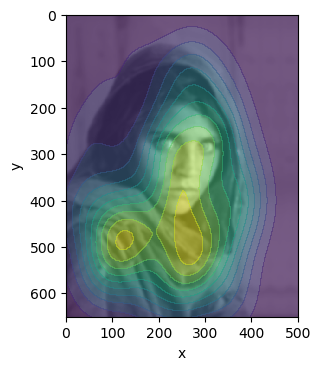

  1%|▉                                                                               | 11/1000 [00:01<02:19,  7.10it/s]

Not enough matches are found - 3/10


  2%|█▊                                                                              | 22/1000 [00:02<02:00,  8.10it/s]

Not enough matches are found - 10/10


  2%|█▉                                                                              | 24/1000 [00:03<01:48,  8.99it/s]

Not enough matches are found - 10/10


  4%|██▊                                                                             | 35/1000 [00:04<01:46,  9.04it/s]

Not enough matches are found - 2/10


  4%|███▍                                                                            | 43/1000 [00:05<01:45,  9.06it/s]

Not enough matches are found - 7/10


  6%|████▋                                                                           | 59/1000 [00:07<02:01,  7.76it/s]

Not enough matches are found - 2/10


  7%|█████▎                                                                          | 67/1000 [00:07<01:51,  8.36it/s]

Not enough matches are found - 8/10
Not enough matches are found - 8/10


  8%|██████▋                                                                         | 83/1000 [00:09<01:50,  8.27it/s]

Not enough matches are found - 4/10
Not enough matches are found - 9/10


  9%|██████▉                                                                         | 87/1000 [00:10<01:45,  8.66it/s]

Not enough matches are found - 5/10


  9%|███████                                                                         | 89/1000 [00:10<01:40,  9.06it/s]

Not enough matches are found - 6/10


  9%|███████▎                                                                        | 92/1000 [00:10<01:58,  7.69it/s]

Not enough matches are found - 6/10


 10%|████████                                                                       | 102/1000 [00:12<01:59,  7.52it/s]

Not enough matches are found - 2/10


 12%|█████████▌                                                                     | 121/1000 [00:14<01:46,  8.24it/s]

Not enough matches are found - 8/10


 13%|██████████▌                                                                    | 133/1000 [00:15<01:39,  8.68it/s]

Not enough matches are found - 4/10


 15%|████████████                                                                   | 152/1000 [00:17<01:40,  8.41it/s]

Not enough matches are found - 7/10


 16%|████████████▍                                                                  | 158/1000 [00:18<01:35,  8.84it/s]

Not enough matches are found - 9/10


 17%|█████████████▋                                                                 | 174/1000 [00:20<01:47,  7.68it/s]

Not enough matches are found - 8/10


 18%|██████████████▏                                                                | 179/1000 [00:21<01:41,  8.09it/s]

Not enough matches are found - 4/10


 18%|██████████████▌                                                                | 185/1000 [00:22<01:35,  8.52it/s]

Not enough matches are found - 9/10


 19%|███████████████                                                                | 191/1000 [00:22<01:35,  8.50it/s]

Not enough matches are found - 5/10


 20%|███████████████▍                                                               | 196/1000 [00:23<01:44,  7.73it/s]

Not enough matches are found - 7/10


 20%|███████████████▋                                                               | 198/1000 [00:23<01:37,  8.19it/s]

Not enough matches are found - 8/10


 20%|███████████████▉                                                               | 201/1000 [00:24<01:50,  7.24it/s]

Not enough matches are found - 8/10


 20%|████████████████                                                               | 204/1000 [00:24<01:44,  7.61it/s]

Not enough matches are found - 5/10


 21%|████████████████▋                                                              | 211/1000 [00:25<01:25,  9.21it/s]

Not enough matches are found - 6/10


 22%|█████████████████▏                                                             | 217/1000 [00:25<01:37,  8.04it/s]

Not enough matches are found - 1/10


 22%|█████████████████▍                                                             | 220/1000 [00:26<01:33,  8.31it/s]

Not enough matches are found - 7/10


 22%|█████████████████▌                                                             | 223/1000 [00:26<01:37,  7.96it/s]

Not enough matches are found - 2/10


 23%|██████████████████▏                                                            | 231/1000 [00:27<01:35,  8.01it/s]

Not enough matches are found - 1/10


 24%|██████████████████▋                                                            | 237/1000 [00:28<01:32,  8.23it/s]

Not enough matches are found - 10/10


 24%|███████████████████▎                                                           | 244/1000 [00:29<01:32,  8.19it/s]

Not enough matches are found - 2/10


 27%|█████████████████████▋                                                         | 274/1000 [00:32<01:14,  9.70it/s]

Not enough matches are found - 3/10


 28%|██████████████████████▌                                                        | 285/1000 [00:33<01:24,  8.47it/s]

Not enough matches are found - 8/10


 29%|██████████████████████▋                                                        | 287/1000 [00:34<01:21,  8.71it/s]

Not enough matches are found - 2/10
Not enough matches are found - 4/10


 30%|███████████████████████▌                                                       | 299/1000 [00:35<01:21,  8.61it/s]

Not enough matches are found - 8/10


 32%|█████████████████████████▎                                                     | 321/1000 [00:38<01:30,  7.52it/s]

Not enough matches are found - 2/10


 32%|█████████████████████████▋                                                     | 325/1000 [00:38<01:24,  8.02it/s]

Not enough matches are found - 10/10


 34%|██████████████████████████▋                                                    | 338/1000 [00:40<01:13,  9.00it/s]

Not enough matches are found - 8/10


 34%|███████████████████████████▏                                                   | 344/1000 [00:41<01:19,  8.27it/s]

Not enough matches are found - 6/10


 37%|█████████████████████████████▎                                                 | 371/1000 [00:44<01:22,  7.58it/s]

Not enough matches are found - 4/10


 37%|█████████████████████████████▍                                                 | 373/1000 [00:44<01:16,  8.20it/s]

Not enough matches are found - 3/10


 39%|██████████████████████████████▉                                                | 391/1000 [00:46<01:09,  8.75it/s]

Not enough matches are found - 2/10


 40%|███████████████████████████████▍                                               | 398/1000 [00:47<01:20,  7.45it/s]

Not enough matches are found - 9/10


 40%|███████████████████████████████▊                                               | 403/1000 [00:48<01:11,  8.30it/s]

Not enough matches are found - 7/10


 40%|███████████████████████████████▉                                               | 405/1000 [00:48<01:08,  8.69it/s]

Not enough matches are found - 2/10


 41%|████████████████████████████████▍                                              | 410/1000 [00:49<01:08,  8.66it/s]

Not enough matches are found - 7/10


 42%|████████████████████████████████▊                                              | 415/1000 [00:49<01:00,  9.70it/s]

Not enough matches are found - 8/10


 42%|████████████████████████████████▉                                              | 417/1000 [00:49<00:56, 10.26it/s]

Not enough matches are found - 2/10


 42%|█████████████████████████████████▎                                             | 421/1000 [00:50<01:03,  9.15it/s]

Not enough matches are found - 7/10


 43%|█████████████████████████████████▉                                             | 430/1000 [00:51<01:01,  9.32it/s]

Not enough matches are found - 5/10


 44%|██████████████████████████████████▌                                            | 438/1000 [00:51<00:57,  9.75it/s]

Not enough matches are found - 6/10


 44%|██████████████████████████████████▋                                            | 439/1000 [00:52<01:02,  9.04it/s]

Not enough matches are found - 7/10


 45%|███████████████████████████████████▍                                           | 448/1000 [00:53<01:47,  5.15it/s]

Not enough matches are found - 8/10
Not enough matches are found - 8/10


 45%|███████████████████████████████████▌                                           | 450/1000 [00:53<01:28,  6.20it/s]

Not enough matches are found - 2/10


 45%|███████████████████████████████████▋                                           | 452/1000 [00:53<01:15,  7.28it/s]

Not enough matches are found - 3/10


 47%|████████████████████████████████████▉                                          | 467/1000 [00:55<01:09,  7.66it/s]

Not enough matches are found - 0/10


 49%|██████████████████████████████████████▉                                        | 493/1000 [00:58<01:07,  7.50it/s]

Not enough matches are found - 5/10


 50%|███████████████████████████████████████▊                                       | 504/1000 [00:59<00:58,  8.49it/s]

Not enough matches are found - 4/10


 52%|█████████████████████████████████████████▎                                     | 523/1000 [01:01<00:53,  8.85it/s]

Not enough matches are found - 2/10


 56%|████████████████████████████████████████████▍                                  | 563/1000 [01:06<00:56,  7.72it/s]

Not enough matches are found - 3/10


 57%|████████████████████████████████████████████▋                                  | 566/1000 [01:06<00:53,  8.11it/s]

Not enough matches are found - 6/10


 57%|█████████████████████████████████████████████▏                                 | 572/1000 [01:07<00:47,  9.08it/s]

Not enough matches are found - 5/10


 58%|██████████████████████████████████████████████▏                                | 585/1000 [01:09<00:51,  8.13it/s]

Not enough matches are found - 10/10


 59%|██████████████████████████████████████████████▊                                | 593/1000 [01:10<00:47,  8.56it/s]

Not enough matches are found - 6/10


 60%|███████████████████████████████████████████████▋                               | 604/1000 [01:11<00:41,  9.48it/s]

Not enough matches are found - 2/10


 62%|████████████████████████████████████████████████▉                              | 620/1000 [01:13<00:43,  8.71it/s]

Not enough matches are found - 1/10


 64%|██████████████████████████████████████████████████▋                            | 641/1000 [01:15<00:46,  7.64it/s]

Not enough matches are found - 2/10


 64%|██████████████████████████████████████████████████▊                            | 643/1000 [01:15<00:46,  7.73it/s]

Not enough matches are found - 6/10


 68%|█████████████████████████████████████████████████████▋                         | 680/1000 [01:20<00:38,  8.34it/s]

Not enough matches are found - 3/10


 72%|████████████████████████████████████████████████████████▍                      | 715/1000 [01:24<00:36,  7.85it/s]

Not enough matches are found - 8/10


 72%|████████████████████████████████████████████████████████▋                      | 717/1000 [01:24<00:31,  8.90it/s]

Not enough matches are found - 7/10


 73%|█████████████████████████████████████████████████████████▋                     | 730/1000 [01:26<00:36,  7.35it/s]

Not enough matches are found - 9/10


 74%|██████████████████████████████████████████████████████████▍                    | 740/1000 [01:27<00:32,  8.02it/s]

Not enough matches are found - 8/10


 74%|██████████████████████████████████████████████████████████▌                    | 742/1000 [01:27<00:33,  7.69it/s]

Not enough matches are found - 6/10
Not enough matches are found - 2/10


 75%|███████████████████████████████████████████████████████████▎                   | 750/1000 [01:28<00:28,  8.92it/s]

Not enough matches are found - 6/10


 76%|███████████████████████████████████████████████████████████▊                   | 757/1000 [01:29<00:28,  8.61it/s]

Not enough matches are found - 2/10


 76%|████████████████████████████████████████████████████████████▎                  | 764/1000 [01:30<00:24,  9.52it/s]

Not enough matches are found - 9/10


 77%|████████████████████████████████████████████████████████████▌                  | 766/1000 [01:30<00:23,  9.75it/s]

Not enough matches are found - 10/10


 78%|█████████████████████████████████████████████████████████████▍                 | 777/1000 [01:31<00:25,  8.62it/s]

Not enough matches are found - 10/10


 79%|██████████████████████████████████████████████████████████████▎                | 789/1000 [01:33<00:36,  5.83it/s]

Not enough matches are found - 6/10


 81%|███████████████████████████████████████████████████████████████▊               | 807/1000 [01:35<00:25,  7.43it/s]

Not enough matches are found - 3/10


 81%|███████████████████████████████████████████████████████████████▊               | 808/1000 [01:35<00:25,  7.58it/s]

Not enough matches are found - 8/10


 82%|████████████████████████████████████████████████████████████████▊              | 820/1000 [01:37<00:19,  9.22it/s]

Not enough matches are found - 0/10


 83%|█████████████████████████████████████████████████████████████████▋             | 831/1000 [01:38<00:22,  7.51it/s]

Not enough matches are found - 3/10


 84%|██████████████████████████████████████████████████████████████████▋            | 844/1000 [01:40<00:23,  6.53it/s]

Not enough matches are found - 5/10


 86%|████████████████████████████████████████████████████████████████████▎          | 864/1000 [01:42<00:15,  8.74it/s]

Not enough matches are found - 9/10


 87%|████████████████████████████████████████████████████████████████████▉          | 872/1000 [01:43<00:15,  8.04it/s]

Not enough matches are found - 6/10


 88%|█████████████████████████████████████████████████████████████████████▎         | 877/1000 [01:44<00:14,  8.30it/s]

Not enough matches are found - 9/10


 89%|██████████████████████████████████████████████████████████████████████▌        | 893/1000 [01:46<00:11,  9.38it/s]

Not enough matches are found - 8/10


 91%|███████████████████████████████████████████████████████████████████████▋       | 908/1000 [01:48<00:14,  6.26it/s]

Not enough matches are found - 6/10


 91%|███████████████████████████████████████████████████████████████████████▉       | 910/1000 [01:48<00:13,  6.46it/s]

Not enough matches are found - 3/10


 92%|████████████████████████████████████████████████████████████████████████▌      | 919/1000 [01:50<00:09,  8.20it/s]

Not enough matches are found - 5/10


 94%|██████████████████████████████████████████████████████████████████████████▏    | 939/1000 [01:52<00:09,  6.28it/s]

Not enough matches are found - 3/10


 94%|██████████████████████████████████████████████████████████████████████████▋    | 945/1000 [01:53<00:06,  7.86it/s]

Not enough matches are found - 9/10


 95%|██████████████████████████████████████████████████████████████████████████▉    | 948/1000 [01:53<00:06,  7.59it/s]

Not enough matches are found - 9/10


 95%|██████████████████████████████████████████████████████████████████████████▉    | 949/1000 [01:53<00:07,  6.84it/s]

Not enough matches are found - 2/10


 99%|██████████████████████████████████████████████████████████████████████████████▎| 991/1000 [01:58<00:01,  7.60it/s]

Not enough matches are found - 8/10


100%|██████████████████████████████████████████████████████████████████████████████▉| 999/1000 [01:59<00:00,  6.79it/s]

Not enough matches are found - 5/10


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:59<00:00,  7.09it/s]


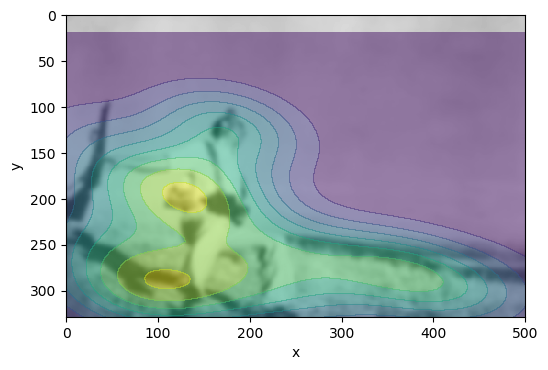

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

Not enough matches are found - 0/10


  0%|                                                                                 | 1/1000 [00:00<02:11,  7.60it/s]

Not enough matches are found - 0/10


  0%|▎                                                                                | 4/1000 [00:00<02:39,  6.23it/s]

Not enough matches are found - 2/10


  1%|▍                                                                                | 6/1000 [00:01<02:59,  5.55it/s]

Not enough matches are found - 2/10


  1%|▌                                                                                | 7/1000 [00:01<03:01,  5.47it/s]

Not enough matches are found - 5/10


  1%|▋                                                                                | 9/1000 [00:01<03:31,  4.68it/s]

Not enough matches are found - 4/10


  1%|▊                                                                               | 10/1000 [00:01<03:05,  5.33it/s]

Not enough matches are found - 4/10


  1%|▉                                                                               | 12/1000 [00:02<03:09,  5.21it/s]

Not enough matches are found - 2/10


  2%|█▎                                                                              | 16/1000 [00:03<03:35,  4.56it/s]

Not enough matches are found - 2/10


  2%|█▊                                                                              | 22/1000 [00:04<04:23,  3.72it/s]

Not enough matches are found - 1/10


  2%|██                                                                              | 25/1000 [00:05<03:31,  4.60it/s]

Not enough matches are found - 5/10


  3%|██                                                                              | 26/1000 [00:05<03:28,  4.68it/s]

Not enough matches are found - 2/10


  3%|██▏                                                                             | 27/1000 [00:05<03:42,  4.37it/s]

Not enough matches are found - 2/10


  3%|██▏                                                                             | 28/1000 [00:05<03:33,  4.55it/s]

Not enough matches are found - 3/10


  3%|██▎                                                                             | 29/1000 [00:06<03:19,  4.86it/s]

Not enough matches are found - 3/10


  3%|██▋                                                                             | 33/1000 [00:07<04:16,  3.77it/s]

Not enough matches are found - 4/10


  4%|███▏                                                                            | 40/1000 [00:08<03:27,  4.62it/s]

Not enough matches are found - 3/10


  5%|███▋                                                                            | 46/1000 [00:10<03:26,  4.61it/s]

Not enough matches are found - 1/10


  5%|████                                                                            | 51/1000 [00:11<03:29,  4.52it/s]

Not enough matches are found - 6/10


  6%|████▍                                                                           | 55/1000 [00:11<02:58,  5.28it/s]

Not enough matches are found - 1/10


  6%|████▍                                                                           | 56/1000 [00:12<03:03,  5.13it/s]

Not enough matches are found - 4/10


  7%|█████▎                                                                          | 66/1000 [00:14<03:18,  4.69it/s]

Not enough matches are found - 4/10


  7%|█████▎                                                                          | 67/1000 [00:14<02:57,  5.25it/s]

Not enough matches are found - 4/10


  7%|█████▌                                                                          | 70/1000 [00:15<03:18,  4.68it/s]

Not enough matches are found - 4/10


  7%|█████▊                                                                          | 73/1000 [00:15<02:55,  5.27it/s]

Not enough matches are found - 1/10


  8%|██████                                                                          | 76/1000 [00:16<03:10,  4.84it/s]

Not enough matches are found - 0/10


  8%|██████▎                                                                         | 79/1000 [00:16<02:47,  5.49it/s]

Not enough matches are found - 1/10


  8%|██████▋                                                                         | 83/1000 [00:17<02:47,  5.47it/s]

Not enough matches are found - 5/10


  8%|██████▋                                                                         | 84/1000 [00:17<02:45,  5.53it/s]

Not enough matches are found - 2/10


  8%|██████▊                                                                         | 85/1000 [00:17<02:34,  5.92it/s]

Not enough matches are found - 3/10


  9%|██████▉                                                                         | 86/1000 [00:17<02:43,  5.59it/s]

Not enough matches are found - 0/10


  9%|███████▎                                                                        | 91/1000 [00:19<04:04,  3.72it/s]

Not enough matches are found - 3/10


  9%|███████▎                                                                        | 92/1000 [00:19<03:33,  4.26it/s]

Not enough matches are found - 2/10


 10%|███████▉                                                                        | 99/1000 [00:21<03:33,  4.22it/s]

Not enough matches are found - 2/10


 10%|███████▉                                                                       | 100/1000 [00:21<03:27,  4.35it/s]

Not enough matches are found - 4/10


 10%|███████▉                                                                       | 101/1000 [00:21<02:58,  5.04it/s]

Not enough matches are found - 2/10


 10%|████████                                                                       | 102/1000 [00:21<03:03,  4.90it/s]

Not enough matches are found - 1/10


 10%|████████▏                                                                      | 103/1000 [00:21<02:54,  5.15it/s]

Not enough matches are found - 6/10


 11%|████████▌                                                                      | 108/1000 [00:23<03:18,  4.50it/s]

Not enough matches are found - 2/10


 11%|████████▋                                                                      | 110/1000 [00:23<02:57,  5.02it/s]

Not enough matches are found - 2/10


 12%|█████████                                                                      | 115/1000 [00:24<02:53,  5.09it/s]

Not enough matches are found - 5/10


 12%|█████████▏                                                                     | 116/1000 [00:24<03:06,  4.74it/s]

Not enough matches are found - 2/10


 12%|█████████▏                                                                     | 117/1000 [00:24<02:59,  4.92it/s]

Not enough matches are found - 4/10


 12%|█████████▍                                                                     | 119/1000 [00:25<03:08,  4.66it/s]

Not enough matches are found - 6/10


 12%|█████████▋                                                                     | 122/1000 [00:25<03:23,  4.31it/s]

Not enough matches are found - 1/10


 13%|██████████▏                                                                    | 129/1000 [00:27<03:18,  4.38it/s]

Not enough matches are found - 1/10


 13%|██████████▎                                                                    | 130/1000 [00:27<03:12,  4.53it/s]

Not enough matches are found - 6/10


 13%|██████████▌                                                                    | 133/1000 [00:28<03:29,  4.15it/s]

Not enough matches are found - 3/10


 14%|██████████▋                                                                    | 135/1000 [00:28<03:01,  4.78it/s]

Not enough matches are found - 2/10


 14%|███████████▏                                                                   | 142/1000 [00:29<02:17,  6.23it/s]

Not enough matches are found - 2/10


 14%|███████████▎                                                                   | 143/1000 [00:30<02:37,  5.44it/s]

Not enough matches are found - 2/10


 14%|███████████▍                                                                   | 144/1000 [00:30<02:28,  5.77it/s]

Not enough matches are found - 4/10


 14%|███████████▍                                                                   | 145/1000 [00:30<02:32,  5.59it/s]

Not enough matches are found - 6/10


 15%|███████████▋                                                                   | 148/1000 [00:31<03:13,  4.41it/s]

Not enough matches are found - 1/10


 15%|███████████▊                                                                   | 150/1000 [00:31<03:23,  4.18it/s]

Not enough matches are found - 0/10


 15%|████████████                                                                   | 152/1000 [00:32<03:13,  4.38it/s]

Not enough matches are found - 2/10


 15%|████████████                                                                   | 153/1000 [00:32<03:12,  4.39it/s]

Not enough matches are found - 1/10


 16%|████████████▍                                                                  | 158/1000 [00:33<03:22,  4.16it/s]

Not enough matches are found - 2/10


 16%|████████████▋                                                                  | 161/1000 [00:34<03:00,  4.64it/s]

Not enough matches are found - 1/10


 16%|████████████▉                                                                  | 164/1000 [00:34<02:42,  5.14it/s]

Not enough matches are found - 0/10


 17%|█████████████▌                                                                 | 171/1000 [00:36<02:24,  5.74it/s]

Not enough matches are found - 4/10


 17%|█████████████▌                                                                 | 172/1000 [00:36<02:25,  5.70it/s]

Not enough matches are found - 2/10


 18%|█████████████▉                                                                 | 176/1000 [00:37<02:59,  4.60it/s]

Not enough matches are found - 2/10


 18%|██████████████                                                                 | 178/1000 [00:37<02:52,  4.78it/s]

Not enough matches are found - 3/10


 18%|██████████████▏                                                                | 179/1000 [00:37<02:26,  5.62it/s]

Not enough matches are found - 1/10


 18%|██████████████▍                                                                | 182/1000 [00:38<02:31,  5.42it/s]

Not enough matches are found - 5/10


 18%|██████████████▌                                                                | 184/1000 [00:38<02:53,  4.71it/s]

Not enough matches are found - 4/10


 19%|███████████████                                                                | 190/1000 [00:39<02:58,  4.54it/s]

Not enough matches are found - 1/10


 19%|███████████████                                                                | 191/1000 [00:40<03:15,  4.13it/s]

Not enough matches are found - 10/10


 19%|███████████████▏                                                               | 192/1000 [00:40<02:56,  4.57it/s]

Not enough matches are found - 3/10


 19%|███████████████▎                                                               | 194/1000 [00:40<02:37,  5.13it/s]

Not enough matches are found - 2/10


 20%|███████████████▍                                                               | 195/1000 [00:40<02:24,  5.59it/s]

Not enough matches are found - 2/10


 20%|███████████████▋                                                               | 198/1000 [00:41<02:30,  5.34it/s]

Not enough matches are found - 3/10


 20%|███████████████▋                                                               | 199/1000 [00:41<02:24,  5.53it/s]

Not enough matches are found - 6/10


 20%|███████████████▊                                                               | 200/1000 [00:41<02:23,  5.58it/s]

Not enough matches are found - 2/10


 20%|████████████████                                                               | 204/1000 [00:42<02:20,  5.66it/s]

Not enough matches are found - 8/10


 20%|████████████████▏                                                              | 205/1000 [00:42<02:18,  5.75it/s]

Not enough matches are found - 7/10


 21%|████████████████▎                                                              | 206/1000 [00:42<02:04,  6.37it/s]

Not enough matches are found - 1/10


 21%|████████████████▌                                                              | 210/1000 [00:43<02:19,  5.65it/s]

Not enough matches are found - 4/10


 22%|█████████████████                                                              | 216/1000 [00:44<02:11,  5.96it/s]

Not enough matches are found - 4/10


 22%|█████████████████▎                                                             | 219/1000 [00:45<02:12,  5.90it/s]

Not enough matches are found - 3/10


 22%|█████████████████▍                                                             | 220/1000 [00:45<02:01,  6.43it/s]

Not enough matches are found - 6/10


 23%|██████████████████                                                             | 228/1000 [00:46<02:35,  4.96it/s]

Not enough matches are found - 1/10


 23%|██████████████████▏                                                            | 231/1000 [00:47<02:25,  5.30it/s]

Not enough matches are found - 8/10


 23%|██████████████████▎                                                            | 232/1000 [00:47<02:11,  5.86it/s]

Not enough matches are found - 3/10


 23%|██████████████████▍                                                            | 234/1000 [00:47<02:21,  5.41it/s]

Not enough matches are found - 2/10


 24%|██████████████████▋                                                            | 236/1000 [00:48<02:20,  5.42it/s]

Not enough matches are found - 1/10


 24%|███████████████████▎                                                           | 244/1000 [00:49<02:29,  5.05it/s]

Not enough matches are found - 4/10


 24%|███████████████████▎                                                           | 245/1000 [00:49<02:25,  5.18it/s]

Not enough matches are found - 1/10


 25%|███████████████████▌                                                           | 247/1000 [00:50<02:43,  4.60it/s]

Not enough matches are found - 1/10


 25%|███████████████████▊                                                           | 251/1000 [00:51<02:40,  4.65it/s]

Not enough matches are found - 5/10


 25%|████████████████████                                                           | 254/1000 [00:51<02:24,  5.16it/s]

Not enough matches are found - 3/10


 26%|████████████████████▏                                                          | 255/1000 [00:51<02:14,  5.52it/s]

Not enough matches are found - 0/10


 26%|████████████████████▏                                                          | 256/1000 [00:51<02:03,  6.03it/s]

Not enough matches are found - 4/10


 26%|████████████████████▍                                                          | 259/1000 [00:52<02:12,  5.60it/s]

Not enough matches are found - 5/10


 26%|████████████████████▋                                                          | 262/1000 [00:53<02:42,  4.54it/s]

Not enough matches are found - 3/10


 26%|████████████████████▊                                                          | 264/1000 [00:53<02:19,  5.29it/s]

Not enough matches are found - 5/10


 27%|█████████████████████                                                          | 266/1000 [00:53<02:19,  5.26it/s]

Not enough matches are found - 2/10


 27%|█████████████████████▍                                                         | 272/1000 [00:55<02:17,  5.31it/s]

Not enough matches are found - 2/10


 27%|█████████████████████▌                                                         | 273/1000 [00:55<02:17,  5.29it/s]

Not enough matches are found - 5/10


 27%|█████████████████████▋                                                         | 274/1000 [00:55<02:09,  5.60it/s]

Not enough matches are found - 4/10


 28%|█████████████████████▋                                                         | 275/1000 [00:55<02:02,  5.93it/s]

Not enough matches are found - 3/10


 28%|█████████████████████▊                                                         | 276/1000 [00:55<01:51,  6.49it/s]

Not enough matches are found - 1/10


 28%|█████████████████████▉                                                         | 277/1000 [00:55<02:08,  5.64it/s]

Not enough matches are found - 2/10


 28%|██████████████████████▏                                                        | 281/1000 [00:56<02:07,  5.63it/s]

Not enough matches are found - 1/10


 28%|██████████████████████▎                                                        | 282/1000 [00:56<02:02,  5.87it/s]

Not enough matches are found - 1/10


 28%|██████████████████████▎                                                        | 283/1000 [00:57<02:03,  5.78it/s]

Not enough matches are found - 4/10


 28%|██████████████████████▍                                                        | 284/1000 [00:57<02:00,  5.92it/s]

Not enough matches are found - 2/10


 29%|██████████████████████▌                                                        | 286/1000 [00:57<01:52,  6.33it/s]

Not enough matches are found - 4/10


 29%|██████████████████████▋                                                        | 287/1000 [00:57<01:42,  6.98it/s]

Not enough matches are found - 2/10


 29%|██████████████████████▉                                                        | 290/1000 [00:58<01:45,  6.73it/s]

Not enough matches are found - 2/10


 29%|███████████████████████                                                        | 292/1000 [00:58<01:52,  6.31it/s]

Not enough matches are found - 9/10


 29%|███████████████████████▏                                                       | 294/1000 [00:58<02:07,  5.52it/s]

Not enough matches are found - 3/10


 30%|███████████████████████▍                                                       | 297/1000 [00:59<02:17,  5.10it/s]

Not enough matches are found - 1/10


 30%|███████████████████████▌                                                       | 298/1000 [00:59<02:09,  5.42it/s]

Not enough matches are found - 3/10


 30%|███████████████████████▊                                                       | 302/1000 [01:00<02:22,  4.92it/s]

Not enough matches are found - 2/10


 30%|████████████████████████                                                       | 304/1000 [01:00<02:00,  5.78it/s]

Not enough matches are found - 6/10


 31%|████████████████████████▍                                                      | 309/1000 [01:01<02:19,  4.97it/s]

Not enough matches are found - 2/10


 31%|████████████████████████▋                                                      | 313/1000 [01:02<02:24,  4.77it/s]

Not enough matches are found - 5/10


 32%|████████████████████████▉                                                      | 315/1000 [01:02<01:59,  5.74it/s]

Not enough matches are found - 4/10


 32%|████████████████████████▉                                                      | 316/1000 [01:02<01:58,  5.75it/s]

Not enough matches are found - 3/10


 32%|█████████████████████████                                                      | 318/1000 [01:03<02:03,  5.54it/s]

Not enough matches are found - 3/10


 32%|█████████████████████████▎                                                     | 320/1000 [01:03<02:14,  5.06it/s]

Not enough matches are found - 0/10


 32%|█████████████████████████▎                                                     | 321/1000 [01:03<02:15,  5.01it/s]

Not enough matches are found - 2/10


 32%|█████████████████████████▍                                                     | 322/1000 [01:04<02:05,  5.39it/s]

Not enough matches are found - 8/10


 32%|█████████████████████████▌                                                     | 323/1000 [01:04<02:19,  4.84it/s]

Not enough matches are found - 1/10


 32%|█████████████████████████▌                                                     | 324/1000 [01:04<02:03,  5.49it/s]

Not enough matches are found - 2/10


 33%|█████████████████████████▊                                                     | 326/1000 [01:04<01:58,  5.71it/s]

Not enough matches are found - 0/10


 33%|█████████████████████████▊                                                     | 327/1000 [01:04<01:54,  5.89it/s]

Not enough matches are found - 8/10


 33%|█████████████████████████▉                                                     | 329/1000 [01:05<02:10,  5.14it/s]

Not enough matches are found - 6/10


 33%|██████████████████████████▎                                                    | 333/1000 [01:06<01:56,  5.72it/s]

Not enough matches are found - 1/10


 34%|██████████████████████████▌                                                    | 336/1000 [01:06<01:53,  5.85it/s]

Not enough matches are found - 6/10


 34%|██████████████████████████▌                                                    | 337/1000 [01:06<01:51,  5.97it/s]

Not enough matches are found - 3/10


 34%|██████████████████████████▊                                                    | 339/1000 [01:07<01:59,  5.53it/s]

Not enough matches are found - 1/10


 34%|███████████████████████████                                                    | 342/1000 [01:07<01:57,  5.62it/s]

Not enough matches are found - 5/10


 34%|███████████████████████████                                                    | 343/1000 [01:07<01:53,  5.77it/s]

Not enough matches are found - 4/10


 34%|███████████████████████████▏                                                   | 344/1000 [01:07<01:56,  5.64it/s]

Not enough matches are found - 3/10


 35%|███████████████████████████▎                                                   | 346/1000 [01:08<01:43,  6.29it/s]

Not enough matches are found - 0/10


 35%|███████████████████████████▍                                                   | 347/1000 [01:08<01:54,  5.71it/s]

Not enough matches are found - 1/10


 35%|███████████████████████████▋                                                   | 350/1000 [01:08<01:57,  5.51it/s]

Not enough matches are found - 6/10


 35%|███████████████████████████▋                                                   | 351/1000 [01:09<01:56,  5.58it/s]

Not enough matches are found - 9/10


 35%|███████████████████████████▊                                                   | 352/1000 [01:09<01:42,  6.33it/s]

Not enough matches are found - 3/10


 36%|████████████████████████████▏                                                  | 357/1000 [01:10<02:05,  5.11it/s]

Not enough matches are found - 4/10


 36%|████████████████████████████▎                                                  | 358/1000 [01:10<01:57,  5.46it/s]

Not enough matches are found - 1/10


 36%|████████████████████████████▎                                                  | 359/1000 [01:10<02:00,  5.34it/s]

Not enough matches are found - 7/10


 36%|████████████████████████████▍                                                  | 360/1000 [01:10<02:04,  5.13it/s]

Not enough matches are found - 6/10


 36%|████████████████████████████▌                                                  | 362/1000 [01:11<01:54,  5.55it/s]

Not enough matches are found - 1/10


 36%|████████████████████████████▊                                                  | 365/1000 [01:11<02:04,  5.10it/s]

Not enough matches are found - 2/10


 37%|████████████████████████████▉                                                  | 367/1000 [01:12<02:13,  4.73it/s]

Not enough matches are found - 0/10


 37%|█████████████████████████████▏                                                 | 369/1000 [01:12<02:10,  4.82it/s]

Not enough matches are found - 6/10


 37%|█████████████████████████████▏                                                 | 370/1000 [01:12<01:53,  5.55it/s]

Not enough matches are found - 1/10


 37%|█████████████████████████████▎                                                 | 371/1000 [01:12<01:41,  6.17it/s]

Not enough matches are found - 0/10


 37%|█████████████████████████████▍                                                 | 372/1000 [01:12<01:34,  6.67it/s]

Not enough matches are found - 5/10


 37%|█████████████████████████████▌                                                 | 374/1000 [01:13<01:53,  5.51it/s]

Not enough matches are found - 3/10


 38%|█████████████████████████████▋                                                 | 376/1000 [01:13<01:40,  6.21it/s]

Not enough matches are found - 6/10


 38%|█████████████████████████████▊                                                 | 377/1000 [01:13<01:33,  6.67it/s]

Not enough matches are found - 2/10


 38%|██████████████████████████████                                                 | 381/1000 [01:14<02:00,  5.13it/s]

Not enough matches are found - 0/10


 40%|███████████████████████████████▏                                               | 395/1000 [01:17<01:47,  5.65it/s]

Not enough matches are found - 3/10


 40%|███████████████████████████████▎                                               | 396/1000 [01:17<01:41,  5.93it/s]

Not enough matches are found - 2/10


 40%|███████████████████████████████▋                                               | 401/1000 [01:18<01:59,  5.01it/s]

Not enough matches are found - 1/10


 40%|███████████████████████████████▊                                               | 402/1000 [01:18<02:02,  4.89it/s]

Not enough matches are found - 2/10


 40%|███████████████████████████████▊                                               | 403/1000 [01:18<01:44,  5.71it/s]

Not enough matches are found - 4/10


 40%|███████████████████████████████▉                                               | 404/1000 [01:18<01:41,  5.85it/s]

Not enough matches are found - 2/10


 40%|███████████████████████████████▉                                               | 405/1000 [01:19<01:38,  6.04it/s]

Not enough matches are found - 4/10


 41%|████████████████████████████████                                               | 406/1000 [01:19<01:39,  5.96it/s]

Not enough matches are found - 1/10


 41%|████████████████████████████████▏                                              | 407/1000 [01:19<01:36,  6.16it/s]

Not enough matches are found - 1/10


 41%|████████████████████████████████▏                                              | 408/1000 [01:19<01:39,  5.96it/s]

Not enough matches are found - 4/10


 41%|████████████████████████████████▎                                              | 409/1000 [01:19<01:44,  5.66it/s]

Not enough matches are found - 3/10


 41%|████████████████████████████████▍                                              | 411/1000 [01:20<01:40,  5.86it/s]

Not enough matches are found - 0/10


 42%|████████████████████████████████▊                                              | 416/1000 [01:20<01:55,  5.06it/s]

Not enough matches are found - 9/10


 42%|████████████████████████████████▉                                              | 417/1000 [01:21<01:41,  5.74it/s]

Not enough matches are found - 2/10


 42%|█████████████████████████████████                                              | 419/1000 [01:21<01:36,  6.00it/s]

Not enough matches are found - 3/10


 42%|█████████████████████████████████▎                                             | 422/1000 [01:22<01:42,  5.64it/s]

Not enough matches are found - 2/10


 42%|█████████████████████████████████▍                                             | 423/1000 [01:22<01:43,  5.56it/s]

Not enough matches are found - 3/10


 42%|█████████████████████████████████▍                                             | 424/1000 [01:22<01:40,  5.73it/s]

Not enough matches are found - 1/10


 43%|█████████████████████████████████▊                                             | 428/1000 [01:23<01:47,  5.32it/s]

Not enough matches are found - 3/10


 43%|██████████████████████████████████                                             | 431/1000 [01:23<01:50,  5.16it/s]

Not enough matches are found - 10/10


 43%|██████████████████████████████████▏                                            | 432/1000 [01:23<01:46,  5.35it/s]

Not enough matches are found - 6/10


 43%|██████████████████████████████████▏                                            | 433/1000 [01:23<01:34,  5.99it/s]

Not enough matches are found - 1/10


 44%|██████████████████████████████████▎                                            | 435/1000 [01:24<01:35,  5.95it/s]

Not enough matches are found - 1/10


 44%|██████████████████████████████████▋                                            | 439/1000 [01:24<01:34,  5.92it/s]

Not enough matches are found - 2/10


 44%|██████████████████████████████████▊                                            | 441/1000 [01:25<02:15,  4.12it/s]

Not enough matches are found - 2/10


 44%|██████████████████████████████████▉                                            | 442/1000 [01:25<01:59,  4.66it/s]

Not enough matches are found - 1/10


 44%|███████████████████████████████████                                            | 444/1000 [01:26<01:40,  5.55it/s]

Not enough matches are found - 3/10


 44%|███████████████████████████████████▏                                           | 445/1000 [01:26<01:39,  5.58it/s]

Not enough matches are found - 4/10


 45%|███████████████████████████████████▎                                           | 447/1000 [01:26<01:52,  4.93it/s]

Not enough matches are found - 2/10


 45%|███████████████████████████████████▍                                           | 449/1000 [01:27<01:50,  4.99it/s]

Not enough matches are found - 9/10


 45%|███████████████████████████████████▌                                           | 450/1000 [01:27<02:01,  4.52it/s]

Not enough matches are found - 1/10


 46%|███████████████████████████████████▉                                           | 455/1000 [01:28<01:59,  4.56it/s]

Not enough matches are found - 3/10


 46%|████████████████████████████████████▏                                          | 458/1000 [01:28<01:34,  5.73it/s]

Not enough matches are found - 1/10


 46%|████████████████████████████████████▍                                          | 461/1000 [01:29<01:42,  5.26it/s]

Not enough matches are found - 2/10


 46%|████████████████████████████████████▍                                          | 462/1000 [01:29<01:35,  5.61it/s]

Not enough matches are found - 9/10


 47%|████████████████████████████████████▊                                          | 466/1000 [01:30<01:40,  5.32it/s]

Not enough matches are found - 4/10


 47%|████████████████████████████████████▉                                          | 468/1000 [01:30<01:32,  5.76it/s]

Not enough matches are found - 5/10


 47%|█████████████████████████████████████                                          | 469/1000 [01:30<01:31,  5.79it/s]

Not enough matches are found - 3/10


 48%|█████████████████████████████████████▌                                         | 475/1000 [01:31<01:30,  5.81it/s]

Not enough matches are found - 2/10


 48%|█████████████████████████████████████▌                                         | 476/1000 [01:32<01:26,  6.09it/s]

Not enough matches are found - 1/10


 48%|█████████████████████████████████████▉                                         | 480/1000 [01:32<01:39,  5.25it/s]

Not enough matches are found - 0/10


 48%|██████████████████████████████████████▏                                        | 483/1000 [01:33<01:32,  5.61it/s]

Not enough matches are found - 3/10


 48%|██████████████████████████████████████▎                                        | 485/1000 [01:33<01:47,  4.79it/s]

Not enough matches are found - 1/10


 50%|███████████████████████████████████████▎                                       | 497/1000 [01:36<01:35,  5.29it/s]

Not enough matches are found - 4/10


 50%|███████████████████████████████████████▍                                       | 499/1000 [01:36<01:30,  5.54it/s]

Not enough matches are found - 2/10


 50%|███████████████████████████████████████▌                                       | 501/1000 [01:37<01:35,  5.21it/s]

Not enough matches are found - 5/10


 51%|████████████████████████████████████████                                       | 507/1000 [01:37<01:20,  6.11it/s]

Not enough matches are found - 1/10


 51%|████████████████████████████████████████▏                                      | 509/1000 [01:38<01:21,  6.02it/s]

Not enough matches are found - 3/10


 51%|████████████████████████████████████████▎                                      | 511/1000 [01:38<01:14,  6.53it/s]

Not enough matches are found - 1/10


 51%|████████████████████████████████████████▍                                      | 512/1000 [01:38<01:11,  6.84it/s]

Not enough matches are found - 1/10


 51%|████████████████████████████████████████▌                                      | 513/1000 [01:38<01:10,  6.89it/s]

Not enough matches are found - 2/10


 52%|████████████████████████████████████████▉                                      | 518/1000 [01:39<01:25,  5.66it/s]

Not enough matches are found - 0/10


 52%|█████████████████████████████████████████                                      | 520/1000 [01:40<01:21,  5.89it/s]

Not enough matches are found - 0/10


 52%|█████████████████████████████████████████▏                                     | 522/1000 [01:40<01:23,  5.70it/s]

Not enough matches are found - 2/10


 53%|█████████████████████████████████████████▌                                     | 526/1000 [01:41<01:20,  5.86it/s]

Not enough matches are found - 1/10


 53%|█████████████████████████████████████████▊                                     | 529/1000 [01:41<01:28,  5.33it/s]

Not enough matches are found - 6/10


 53%|█████████████████████████████████████████▊                                     | 530/1000 [01:41<01:20,  5.86it/s]

Not enough matches are found - 1/10


 53%|██████████████████████████████████████████                                     | 533/1000 [01:42<01:24,  5.51it/s]

Not enough matches are found - 1/10


 53%|██████████████████████████████████████████▏                                    | 534/1000 [01:42<01:35,  4.90it/s]

Not enough matches are found - 2/10


 54%|██████████████████████████████████████████▎                                    | 535/1000 [01:42<01:30,  5.13it/s]

Not enough matches are found - 6/10


 54%|██████████████████████████████████████████▌                                    | 538/1000 [01:43<01:46,  4.33it/s]

Not enough matches are found - 1/10


 54%|██████████████████████████████████████████▉                                    | 543/1000 [01:44<01:53,  4.04it/s]

Not enough matches are found - 1/10


 55%|███████████████████████████████████████████▎                                   | 548/1000 [01:45<01:34,  4.79it/s]

Not enough matches are found - 1/10


 55%|███████████████████████████████████████████▌                                   | 552/1000 [01:46<01:23,  5.36it/s]

Not enough matches are found - 3/10


 55%|███████████████████████████████████████████▋                                   | 553/1000 [01:46<01:24,  5.30it/s]

Not enough matches are found - 5/10


 55%|███████████████████████████████████████████▊                                   | 554/1000 [01:46<01:17,  5.74it/s]

Not enough matches are found - 2/10


 56%|████████████████████████████████████████████▏                                  | 559/1000 [01:47<01:24,  5.21it/s]

Not enough matches are found - 1/10


 56%|████████████████████████████████████████████▌                                  | 564/1000 [01:48<01:30,  4.84it/s]

Not enough matches are found - 5/10


 56%|████████████████████████████████████████████▋                                  | 565/1000 [01:48<01:24,  5.17it/s]

Not enough matches are found - 3/10


 57%|████████████████████████████████████████████▊                                  | 567/1000 [01:49<01:39,  4.34it/s]

Not enough matches are found - 3/10


 57%|█████████████████████████████████████████████▏                                 | 572/1000 [01:50<01:27,  4.90it/s]

Not enough matches are found - 1/10


 57%|█████████████████████████████████████████████▎                                 | 573/1000 [01:50<01:16,  5.55it/s]

Not enough matches are found - 4/10


 58%|█████████████████████████████████████████████▌                                 | 576/1000 [01:51<01:23,  5.09it/s]

Not enough matches are found - 1/10


 58%|█████████████████████████████████████████████▌                                 | 577/1000 [01:51<01:19,  5.34it/s]

Not enough matches are found - 2/10


 58%|██████████████████████████████████████████████                                 | 583/1000 [01:52<01:07,  6.16it/s]

Not enough matches are found - 2/10


 58%|██████████████████████████████████████████████▏                                | 584/1000 [01:52<01:12,  5.72it/s]

Not enough matches are found - 1/10


 59%|██████████████████████████████████████████████▎                                | 587/1000 [01:53<01:21,  5.07it/s]

Not enough matches are found - 3/10


 59%|██████████████████████████████████████████████▋                                | 591/1000 [01:53<01:14,  5.51it/s]

Not enough matches are found - 1/10


 59%|██████████████████████████████████████████████▉                                | 594/1000 [01:54<01:15,  5.37it/s]

Not enough matches are found - 2/10


 60%|███████████████████████████████████████████████▏                               | 597/1000 [01:55<01:10,  5.74it/s]

Not enough matches are found - 2/10


 60%|███████████████████████████████████████████████▏                               | 598/1000 [01:55<01:11,  5.64it/s]

Not enough matches are found - 6/10


 60%|███████████████████████████████████████████████▎                               | 599/1000 [01:55<01:11,  5.64it/s]

Not enough matches are found - 6/10


 60%|███████████████████████████████████████████████▌                               | 602/1000 [01:55<01:11,  5.57it/s]

Not enough matches are found - 2/10


 60%|███████████████████████████████████████████████▋                               | 604/1000 [01:56<01:22,  4.82it/s]

Not enough matches are found - 4/10


 61%|████████████████████████████████████████████████                               | 608/1000 [01:57<01:19,  4.95it/s]

Not enough matches are found - 2/10


 61%|████████████████████████████████████████████████                               | 609/1000 [01:57<01:08,  5.70it/s]

Not enough matches are found - 5/10


 61%|████████████████████████████████████████████████▎                              | 612/1000 [01:57<01:04,  6.01it/s]

Not enough matches are found - 1/10


 61%|████████████████████████████████████████████████▌                              | 614/1000 [01:58<01:13,  5.26it/s]

Not enough matches are found - 1/10


 62%|████████████████████████████████████████████████▉                              | 620/1000 [01:59<01:07,  5.65it/s]

Not enough matches are found - 3/10


 62%|█████████████████████████████████████████████████▏                             | 622/1000 [01:59<01:01,  6.10it/s]

Not enough matches are found - 2/10


 62%|█████████████████████████████████████████████████▏                             | 623/1000 [01:59<01:04,  5.85it/s]

Not enough matches are found - 9/10


 62%|█████████████████████████████████████████████████▎                             | 624/1000 [02:00<01:12,  5.19it/s]

Not enough matches are found - 6/10


 63%|█████████████████████████████████████████████████▋                             | 629/1000 [02:00<01:06,  5.58it/s]

Not enough matches are found - 2/10


 63%|█████████████████████████████████████████████████▊                             | 630/1000 [02:01<01:02,  5.96it/s]

Not enough matches are found - 0/10


 63%|█████████████████████████████████████████████████▉                             | 632/1000 [02:01<01:02,  5.91it/s]

Not enough matches are found - 1/10


 63%|██████████████████████████████████████████████████                             | 634/1000 [02:01<01:05,  5.59it/s]

Not enough matches are found - 3/10


 64%|██████████████████████████████████████████████████▏                            | 635/1000 [02:02<01:03,  5.72it/s]

Not enough matches are found - 2/10


 64%|██████████████████████████████████████████████████▋                            | 642/1000 [02:03<01:03,  5.61it/s]

Not enough matches are found - 4/10


 65%|███████████████████████████████████████████████████                            | 646/1000 [02:04<00:59,  5.98it/s]

Not enough matches are found - 2/10


 65%|███████████████████████████████████████████████████▍                           | 651/1000 [02:04<01:09,  5.01it/s]

Not enough matches are found - 2/10


 66%|███████████████████████████████████████████████████▋                           | 655/1000 [02:05<00:55,  6.26it/s]

Not enough matches are found - 1/10


 66%|████████████████████████████████████████████████████                           | 659/1000 [02:06<01:04,  5.29it/s]

Not enough matches are found - 8/10


 66%|████████████████████████████████████████████████████▏                          | 661/1000 [02:06<01:06,  5.07it/s]

Not enough matches are found - 2/10


 67%|████████████████████████████████████████████████████▌                          | 666/1000 [02:07<01:12,  4.61it/s]

Not enough matches are found - 4/10


 67%|████████████████████████████████████████████████████▊                          | 669/1000 [02:08<01:08,  4.85it/s]

Not enough matches are found - 2/10


 67%|████████████████████████████████████████████████████▉                          | 670/1000 [02:08<01:02,  5.32it/s]

Not enough matches are found - 1/10


 67%|█████████████████████████████████████████████████████                          | 671/1000 [02:08<00:59,  5.54it/s]

Not enough matches are found - 10/10


 68%|█████████████████████████████████████████████████████▎                         | 675/1000 [02:09<01:00,  5.38it/s]

Not enough matches are found - 4/10


 68%|█████████████████████████████████████████████████████▍                         | 676/1000 [02:09<01:03,  5.13it/s]

Not enough matches are found - 1/10


 68%|█████████████████████████████████████████████████████▉                         | 682/1000 [02:10<01:00,  5.28it/s]

Not enough matches are found - 5/10


 68%|█████████████████████████████████████████████████████▉                         | 683/1000 [02:11<00:56,  5.66it/s]

Not enough matches are found - 2/10


 68%|██████████████████████████████████████████████████████                         | 685/1000 [02:11<00:49,  6.41it/s]

Not enough matches are found - 2/10


 69%|██████████████████████████████████████████████████████▍                        | 689/1000 [02:12<01:03,  4.93it/s]

Not enough matches are found - 5/10


 69%|██████████████████████████████████████████████████████▌                        | 690/1000 [02:12<01:05,  4.70it/s]

Not enough matches are found - 3/10


 69%|██████████████████████████████████████████████████████▋                        | 692/1000 [02:12<00:56,  5.49it/s]

Not enough matches are found - 5/10


 70%|██████████████████████████████████████████████████████▉                        | 695/1000 [02:13<00:59,  5.13it/s]

Not enough matches are found - 2/10


 70%|██████████████████████████████████████████████████████▉                        | 696/1000 [02:13<00:57,  5.27it/s]

Not enough matches are found - 7/10


 70%|███████████████████████████████████████████████████████▏                       | 698/1000 [02:14<01:14,  4.04it/s]

Not enough matches are found - 4/10


 70%|███████████████████████████████████████████████████████▎                       | 700/1000 [02:14<01:01,  4.86it/s]

Not enough matches are found - 3/10


 70%|███████████████████████████████████████████████████████▍                       | 701/1000 [02:14<00:57,  5.18it/s]

Not enough matches are found - 2/10


 70%|███████████████████████████████████████████████████████▌                       | 703/1000 [02:14<00:57,  5.17it/s]

Not enough matches are found - 2/10


 71%|████████████████████████████████████████████████████████                       | 710/1000 [02:16<00:53,  5.39it/s]

Not enough matches are found - 3/10


 71%|████████████████████████████████████████████████████████▏                      | 711/1000 [02:16<00:51,  5.56it/s]

Not enough matches are found - 1/10


 71%|████████████████████████████████████████████████████████▍                      | 714/1000 [02:16<00:45,  6.35it/s]

Not enough matches are found - 2/10


 72%|████████████████████████████████████████████████████████▌                      | 716/1000 [02:17<00:46,  6.04it/s]

Not enough matches are found - 1/10


 72%|████████████████████████████████████████████████████████▋                      | 717/1000 [02:17<00:42,  6.63it/s]

Not enough matches are found - 5/10


 72%|████████████████████████████████████████████████████████▊                      | 719/1000 [02:17<00:47,  5.89it/s]

Not enough matches are found - 0/10


 72%|█████████████████████████████████████████████████████████                      | 723/1000 [02:18<00:47,  5.79it/s]

Not enough matches are found - 1/10


 72%|█████████████████████████████████████████████████████████▎                     | 725/1000 [02:18<00:48,  5.67it/s]

Not enough matches are found - 1/10


 73%|█████████████████████████████████████████████████████████▊                     | 732/1000 [02:19<00:49,  5.44it/s]

Not enough matches are found - 2/10


 74%|██████████████████████████████████████████████████████████                     | 735/1000 [02:20<00:51,  5.16it/s]

Not enough matches are found - 3/10


 74%|██████████████████████████████████████████████████████████▎                    | 738/1000 [02:20<00:44,  5.83it/s]

Not enough matches are found - 5/10


 74%|██████████████████████████████████████████████████████████▌                    | 741/1000 [02:21<00:51,  5.03it/s]

Not enough matches are found - 6/10


 74%|██████████████████████████████████████████████████████████▋                    | 743/1000 [02:21<00:50,  5.12it/s]

Not enough matches are found - 1/10


 75%|██████████████████████████████████████████████████████████▉                    | 746/1000 [02:22<00:42,  5.96it/s]

Not enough matches are found - 6/10


 75%|███████████████████████████████████████████████████████████                    | 748/1000 [02:22<00:46,  5.39it/s]

Not enough matches are found - 4/10


 75%|███████████████████████████████████████████████████████████▏                   | 749/1000 [02:22<00:44,  5.62it/s]

Not enough matches are found - 2/10


 75%|███████████████████████████████████████████████████████████▎                   | 750/1000 [02:23<00:42,  5.91it/s]

Not enough matches are found - 4/10


 75%|███████████████████████████████████████████████████████████▍                   | 753/1000 [02:23<00:52,  4.70it/s]

Not enough matches are found - 1/10


 75%|███████████████████████████████████████████████████████████▌                   | 754/1000 [02:23<00:47,  5.21it/s]

Not enough matches are found - 9/10


 76%|████████████████████████████████████████████████████████████                   | 761/1000 [02:25<00:44,  5.33it/s]

Not enough matches are found - 4/10


 76%|████████████████████████████████████████████████████████████▏                  | 762/1000 [02:25<00:46,  5.07it/s]

Not enough matches are found - 5/10


 76%|████████████████████████████████████████████████████████████▎                  | 763/1000 [02:25<00:46,  5.07it/s]

Not enough matches are found - 1/10


 76%|████████████████████████████████████████████████████████████▍                  | 765/1000 [02:26<00:53,  4.42it/s]

Not enough matches are found - 7/10


 77%|████████████████████████████████████████████████████████████▌                  | 766/1000 [02:26<00:46,  5.07it/s]

Not enough matches are found - 4/10


 77%|████████████████████████████████████████████████████████████▋                  | 768/1000 [02:26<00:41,  5.56it/s]

Not enough matches are found - 8/10


 77%|████████████████████████████████████████████████████████████▊                  | 769/1000 [02:26<00:41,  5.59it/s]

Not enough matches are found - 3/10


 77%|████████████████████████████████████████████████████████████▉                  | 772/1000 [02:27<00:37,  6.11it/s]

Not enough matches are found - 4/10


 77%|█████████████████████████████████████████████████████████████▏                 | 774/1000 [02:27<00:35,  6.41it/s]

Not enough matches are found - 3/10


 78%|█████████████████████████████████████████████████████████████▏                 | 775/1000 [02:27<00:34,  6.45it/s]

Not enough matches are found - 1/10


 78%|█████████████████████████████████████████████████████████████▌                 | 780/1000 [02:28<00:44,  4.99it/s]

Not enough matches are found - 1/10


 78%|█████████████████████████████████████████████████████████████▊                 | 783/1000 [02:29<00:39,  5.44it/s]

Not enough matches are found - 3/10


 78%|██████████████████████████████████████████████████████████████                 | 785/1000 [02:29<00:46,  4.67it/s]

Not enough matches are found - 6/10


 79%|██████████████████████████████████████████████████████████████▎                | 788/1000 [02:30<00:41,  5.14it/s]

Not enough matches are found - 3/10


 79%|██████████████████████████████████████████████████████████████▍                | 790/1000 [02:30<00:41,  5.12it/s]

Not enough matches are found - 4/10


 79%|██████████████████████████████████████████████████████████████▋                | 793/1000 [02:31<00:32,  6.38it/s]

Not enough matches are found - 0/10


 80%|██████████████████████████████████████████████████████████████▊                | 795/1000 [02:31<00:33,  6.08it/s]

Not enough matches are found - 4/10


 80%|██████████████████████████████████████████████████████████████▉                | 796/1000 [02:31<00:34,  5.88it/s]

Not enough matches are found - 1/10


 80%|███████████████████████████████████████████████████████████████                | 799/1000 [02:32<00:35,  5.74it/s]

Not enough matches are found - 1/10


 80%|███████████████████████████████████████████████████████████████▎               | 802/1000 [02:32<00:36,  5.40it/s]

Not enough matches are found - 1/10


 80%|███████████████████████████████████████████████████████████████▌               | 805/1000 [02:33<00:36,  5.38it/s]

Not enough matches are found - 3/10


 81%|███████████████████████████████████████████████████████████████▊               | 808/1000 [02:33<00:34,  5.60it/s]

Not enough matches are found - 1/10


 81%|███████████████████████████████████████████████████████████████▉               | 809/1000 [02:33<00:30,  6.24it/s]

Not enough matches are found - 3/10


 81%|███████████████████████████████████████████████████████████████▉               | 810/1000 [02:33<00:30,  6.14it/s]

Not enough matches are found - 3/10


 81%|████████████████████████████████████████████████████████████████               | 811/1000 [02:34<00:29,  6.43it/s]

Not enough matches are found - 4/10


 81%|████████████████████████████████████████████████████████████████▏              | 813/1000 [02:34<00:32,  5.78it/s]

Not enough matches are found - 2/10


 81%|████████████████████████████████████████████████████████████████▎              | 814/1000 [02:34<00:30,  6.17it/s]

Not enough matches are found - 2/10


 82%|████████████████████████████████████████████████████████████████▍              | 816/1000 [02:34<00:29,  6.26it/s]

Not enough matches are found - 2/10


 82%|████████████████████████████████████████████████████████████████▌              | 818/1000 [02:35<00:30,  5.96it/s]

Not enough matches are found - 4/10


 82%|████████████████████████████████████████████████████████████████▋              | 819/1000 [02:35<00:27,  6.49it/s]

Not enough matches are found - 3/10


 82%|████████████████████████████████████████████████████████████████▊              | 820/1000 [02:35<00:28,  6.27it/s]

Not enough matches are found - 2/10


 82%|████████████████████████████████████████████████████████████████▉              | 822/1000 [02:36<00:36,  4.91it/s]

Not enough matches are found - 1/10


 82%|█████████████████████████████████████████████████████████████████              | 824/1000 [02:36<00:34,  5.09it/s]

Not enough matches are found - 3/10


 83%|█████████████████████████████████████████████████████████████████▌             | 830/1000 [02:37<00:32,  5.31it/s]

Not enough matches are found - 3/10


 83%|█████████████████████████████████████████████████████████████████▋             | 832/1000 [02:37<00:33,  5.02it/s]

Not enough matches are found - 0/10


 84%|█████████████████████████████████████████████████████████████████▉             | 835/1000 [02:38<00:33,  4.89it/s]

Not enough matches are found - 3/10


 84%|██████████████████████████████████████████████████████████████████▏            | 838/1000 [02:39<00:29,  5.56it/s]

Not enough matches are found - 3/10


 84%|██████████████████████████████████████████████████████████████████▎            | 840/1000 [02:39<00:29,  5.50it/s]

Not enough matches are found - 2/10


 84%|██████████████████████████████████████████████████████████████████▌            | 842/1000 [02:39<00:31,  4.96it/s]

Not enough matches are found - 1/10


 84%|██████████████████████████████████████████████████████████████████▌            | 843/1000 [02:40<00:35,  4.47it/s]

Not enough matches are found - 2/10


 84%|██████████████████████████████████████████████████████████████████▋            | 844/1000 [02:40<00:31,  4.91it/s]

Not enough matches are found - 2/10


 84%|██████████████████████████████████████████████████████████████████▊            | 845/1000 [02:40<00:31,  4.89it/s]

Not enough matches are found - 1/10


 85%|███████████████████████████████████████████████████████████████████▍           | 853/1000 [02:41<00:27,  5.44it/s]

Not enough matches are found - 8/10


 86%|███████████████████████████████████████████████████████████████████▌           | 855/1000 [02:42<00:28,  5.09it/s]

Not enough matches are found - 4/10


 86%|███████████████████████████████████████████████████████████████████▊           | 858/1000 [02:42<00:26,  5.44it/s]

Not enough matches are found - 1/10


 86%|███████████████████████████████████████████████████████████████████▉           | 860/1000 [02:43<00:22,  6.11it/s]

Not enough matches are found - 0/10


 86%|████████████████████████████████████████████████████████████████████▏          | 863/1000 [02:43<00:28,  4.84it/s]

Not enough matches are found - 9/10


 86%|████████████████████████████████████████████████████████████████████▎          | 864/1000 [02:43<00:26,  5.13it/s]

Not enough matches are found - 5/10


 87%|████████████████████████████████████████████████████████████████████▍          | 867/1000 [02:44<00:26,  4.93it/s]

Not enough matches are found - 1/10


 87%|████████████████████████████████████████████████████████████████████▋          | 870/1000 [02:44<00:22,  5.80it/s]

Not enough matches are found - 0/10


 87%|████████████████████████████████████████████████████████████████████▉          | 873/1000 [02:45<00:25,  5.02it/s]

Not enough matches are found - 0/10


 88%|█████████████████████████████████████████████████████████████████████▎         | 877/1000 [02:46<00:28,  4.36it/s]

Not enough matches are found - 3/10


 88%|█████████████████████████████████████████████████████████████████████▌         | 880/1000 [02:46<00:23,  5.16it/s]

Not enough matches are found - 5/10


 88%|█████████████████████████████████████████████████████████████████████▋         | 882/1000 [02:47<00:21,  5.45it/s]

Not enough matches are found - 3/10


 89%|█████████████████████████████████████████████████████████████████████▉         | 886/1000 [02:48<00:21,  5.39it/s]

Not enough matches are found - 5/10


 89%|██████████████████████████████████████████████████████████████████████         | 887/1000 [02:48<00:19,  5.67it/s]

Not enough matches are found - 2/10


 89%|██████████████████████████████████████████████████████████████████████▏        | 888/1000 [02:48<00:20,  5.45it/s]

Not enough matches are found - 0/10


 89%|██████████████████████████████████████████████████████████████████████▍        | 892/1000 [02:49<00:18,  5.73it/s]

Not enough matches are found - 0/10


 90%|██████████████████████████████████████████████████████████████████████▋        | 895/1000 [02:49<00:22,  4.67it/s]

Not enough matches are found - 3/10


 90%|██████████████████████████████████████████████████████████████████████▊        | 897/1000 [02:50<00:18,  5.54it/s]

Not enough matches are found - 4/10


 90%|███████████████████████████████████████████████████████████████████████▎       | 902/1000 [02:51<00:19,  5.08it/s]

Not enough matches are found - 3/10


 90%|███████████████████████████████████████████████████████████████████████▎       | 903/1000 [02:51<00:17,  5.56it/s]

Not enough matches are found - 3/10


 91%|███████████████████████████████████████████████████████████████████████▌       | 906/1000 [02:51<00:16,  5.56it/s]

Not enough matches are found - 2/10


 91%|███████████████████████████████████████████████████████████████████████▋       | 908/1000 [02:52<00:16,  5.66it/s]

Not enough matches are found - 2/10


 91%|███████████████████████████████████████████████████████████████████████▉       | 910/1000 [02:52<00:15,  5.98it/s]

Not enough matches are found - 2/10


 91%|████████████████████████████████████████████████████████████████████████▏      | 913/1000 [02:52<00:16,  5.33it/s]

Not enough matches are found - 1/10


 92%|████████████████████████████████████████████████████████████████████████▌      | 919/1000 [02:54<00:14,  5.55it/s]

Not enough matches are found - 2/10


 92%|████████████████████████████████████████████████████████████████████████▋      | 920/1000 [02:54<00:13,  5.94it/s]

Not enough matches are found - 1/10


 92%|████████████████████████████████████████████████████████████████████████▊      | 921/1000 [02:54<00:14,  5.37it/s]

Not enough matches are found - 1/10


 92%|████████████████████████████████████████████████████████████████████████▊      | 922/1000 [02:54<00:13,  5.58it/s]

Not enough matches are found - 10/10


 92%|████████████████████████████████████████████████████████████████████████▉      | 923/1000 [02:54<00:15,  4.92it/s]

Not enough matches are found - 1/10


 92%|████████████████████████████████████████████████████████████████████████▉      | 924/1000 [02:54<00:14,  5.31it/s]

Not enough matches are found - 2/10


 93%|█████████████████████████████████████████████████████████████████████████▍     | 929/1000 [02:56<00:14,  4.97it/s]

Not enough matches are found - 1/10


 94%|█████████████████████████████████████████████████████████████████████████▊     | 935/1000 [02:57<00:13,  4.88it/s]

Not enough matches are found - 2/10


 94%|█████████████████████████████████████████████████████████████████████████▉     | 936/1000 [02:57<00:11,  5.34it/s]

Not enough matches are found - 1/10


 94%|██████████████████████████████████████████████████████████████████████████     | 938/1000 [02:57<00:12,  5.04it/s]

Not enough matches are found - 9/10


 94%|██████████████████████████████████████████████████████████████████████████▌    | 944/1000 [02:59<00:11,  4.69it/s]

Not enough matches are found - 5/10


 95%|██████████████████████████████████████████████████████████████████████████▉    | 949/1000 [03:00<00:09,  5.57it/s]

Not enough matches are found - 2/10


 95%|███████████████████████████████████████████████████████████████████████████    | 950/1000 [03:00<00:08,  6.09it/s]

Not enough matches are found - 1/10


 95%|███████████████████████████████████████████████████████████████████████████▎   | 953/1000 [03:00<00:09,  5.13it/s]

Not enough matches are found - 2/10


 96%|███████████████████████████████████████████████████████████████████████████▌   | 957/1000 [03:01<00:07,  5.39it/s]

Not enough matches are found - 1/10


 96%|███████████████████████████████████████████████████████████████████████████▋   | 958/1000 [03:01<00:06,  6.07it/s]

Not enough matches are found - 4/10


 96%|███████████████████████████████████████████████████████████████████████████▉   | 961/1000 [03:02<00:06,  5.67it/s]

Not enough matches are found - 3/10


 96%|███████████████████████████████████████████████████████████████████████████▉   | 962/1000 [03:02<00:06,  5.82it/s]

Not enough matches are found - 3/10


 96%|████████████████████████████████████████████████████████████████████████████▏  | 964/1000 [03:02<00:06,  5.43it/s]

Not enough matches are found - 4/10


 97%|████████████████████████████████████████████████████████████████████████████▎  | 966/1000 [03:03<00:07,  4.74it/s]

Not enough matches are found - 2/10


 97%|████████████████████████████████████████████████████████████████████████████▍  | 967/1000 [03:03<00:06,  5.42it/s]

Not enough matches are found - 6/10


 97%|████████████████████████████████████████████████████████████████████████████▌  | 969/1000 [03:03<00:05,  6.10it/s]

Not enough matches are found - 1/10


 97%|████████████████████████████████████████████████████████████████████████████▋  | 971/1000 [03:03<00:04,  6.04it/s]

Not enough matches are found - 8/10


 97%|████████████████████████████████████████████████████████████████████████████▊  | 973/1000 [03:04<00:05,  4.97it/s]

Not enough matches are found - 1/10


 98%|█████████████████████████████████████████████████████████████████████████████▏ | 977/1000 [03:05<00:04,  4.89it/s]

Not enough matches are found - 3/10


 98%|█████████████████████████████████████████████████████████████████████████████▎ | 979/1000 [03:05<00:03,  5.62it/s]

Not enough matches are found - 2/10


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 980/1000 [03:05<00:03,  5.73it/s]

Not enough matches are found - 1/10


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 981/1000 [03:05<00:03,  6.10it/s]

Not enough matches are found - 2/10


 98%|█████████████████████████████████████████████████████████████████████████████▋ | 983/1000 [03:06<00:03,  5.46it/s]

Not enough matches are found - 4/10


 98%|█████████████████████████████████████████████████████████████████████████████▋ | 984/1000 [03:06<00:02,  5.65it/s]

Not enough matches are found - 2/10


 99%|█████████████████████████████████████████████████████████████████████████████▉ | 986/1000 [03:06<00:02,  5.39it/s]

Not enough matches are found - 5/10


 99%|██████████████████████████████████████████████████████████████████████████████ | 988/1000 [03:07<00:02,  5.01it/s]

Not enough matches are found - 1/10


 99%|██████████████████████████████████████████████████████████████████████████████▎| 991/1000 [03:07<00:02,  4.22it/s]

Not enough matches are found - 1/10


 99%|██████████████████████████████████████████████████████████████████████████████▎| 992/1000 [03:08<00:01,  4.38it/s]

Not enough matches are found - 2/10


 99%|██████████████████████████████████████████████████████████████████████████████▌| 994/1000 [03:08<00:01,  5.15it/s]

Not enough matches are found - 5/10


100%|██████████████████████████████████████████████████████████████████████████████▊| 997/1000 [03:09<00:00,  4.46it/s]

Not enough matches are found - 1/10


100%|██████████████████████████████████████████████████████████████████████████████▊| 998/1000 [03:09<00:00,  4.93it/s]

Not enough matches are found - 1/10


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:09<00:00,  5.21it/s]


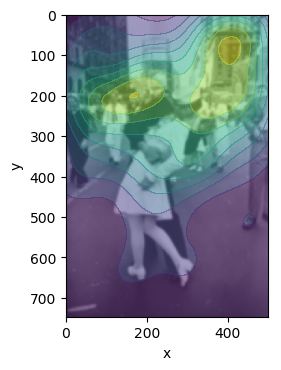

  0%|                                                                                 | 1/1000 [00:00<01:59,  8.36it/s]

Not enough matches are found - 10/10


  0%|▎                                                                                | 4/1000 [00:00<01:44,  9.56it/s]

Not enough matches are found - 4/10


  3%|██                                                                              | 26/1000 [00:02<01:29, 10.88it/s]

Not enough matches are found - 4/10


  3%|██▏                                                                             | 28/1000 [00:02<01:28, 11.01it/s]

Not enough matches are found - 6/10


  4%|███                                                                             | 38/1000 [00:03<01:30, 10.67it/s]

Not enough matches are found - 9/10


  4%|███▌                                                                            | 44/1000 [00:04<01:26, 11.01it/s]

Not enough matches are found - 2/10


  7%|█████▌                                                                          | 69/1000 [00:06<01:39,  9.31it/s]

Not enough matches are found - 3/10


  8%|██████                                                                          | 75/1000 [00:07<01:27, 10.53it/s]

Not enough matches are found - 3/10
Not enough matches are found - 3/10


  9%|██████▉                                                                         | 87/1000 [00:08<01:30, 10.12it/s]

Not enough matches are found - 1/10


 11%|████████▉                                                                      | 113/1000 [00:10<01:19, 11.10it/s]

Not enough matches are found - 2/10


 13%|██████████▌                                                                    | 133/1000 [00:12<01:24, 10.31it/s]

Not enough matches are found - 1/10


 14%|███████████▎                                                                   | 143/1000 [00:13<01:19, 10.78it/s]

Not enough matches are found - 2/10
Not enough matches are found - 4/10


 15%|███████████▊                                                                   | 149/1000 [00:13<01:09, 12.25it/s]

Not enough matches are found - 8/10
Not enough matches are found - 2/10


 16%|████████████▏                                                                  | 155/1000 [00:14<01:26,  9.77it/s]

Not enough matches are found - 0/10


 16%|████████████▋                                                                  | 161/1000 [00:15<01:18, 10.64it/s]

Not enough matches are found - 2/10


 18%|█████████████▊                                                                 | 175/1000 [00:16<01:21, 10.10it/s]

Not enough matches are found - 0/10


 20%|████████████████                                                               | 204/1000 [00:19<01:16, 10.41it/s]

Not enough matches are found - 0/10


 21%|████████████████▌                                                              | 210/1000 [00:19<01:12, 10.84it/s]

Not enough matches are found - 1/10


 22%|█████████████████                                                              | 216/1000 [00:20<01:12, 10.82it/s]

Not enough matches are found - 3/10
Not enough matches are found - 1/10


 22%|█████████████████▍                                                             | 220/1000 [00:20<01:13, 10.66it/s]

Not enough matches are found - 1/10


 24%|███████████████████                                                            | 242/1000 [00:22<01:13, 10.38it/s]

Not enough matches are found - 1/10


 24%|███████████████████▎                                                           | 245/1000 [00:23<01:19,  9.45it/s]

Not enough matches are found - 7/10


 25%|███████████████████▉                                                           | 253/1000 [00:24<01:09, 10.72it/s]

Not enough matches are found - 7/10


 26%|████████████████████▏                                                          | 255/1000 [00:24<01:08, 10.93it/s]

Not enough matches are found - 10/10


 26%|████████████████████▎                                                          | 257/1000 [00:24<01:05, 11.31it/s]

Not enough matches are found - 3/10


 28%|██████████████████████▌                                                        | 285/1000 [00:27<01:09, 10.29it/s]

Not enough matches are found - 6/10


 29%|██████████████████████▉                                                        | 291/1000 [00:27<01:09, 10.13it/s]

Not enough matches are found - 3/10


 30%|███████████████████████▍                                                       | 297/1000 [00:28<01:06, 10.55it/s]

Not enough matches are found - 0/10


 31%|████████████████████████▌                                                      | 311/1000 [00:29<01:04, 10.62it/s]

Not enough matches are found - 1/10


 32%|█████████████████████████                                                      | 317/1000 [00:30<01:07, 10.12it/s]

Not enough matches are found - 3/10


 32%|█████████████████████████▏                                                     | 319/1000 [00:30<01:08,  9.99it/s]

Not enough matches are found - 2/10


 33%|█████████████████████████▉                                                     | 329/1000 [00:31<01:03, 10.55it/s]

Not enough matches are found - 1/10


 35%|███████████████████████████▌                                                   | 349/1000 [00:33<01:02, 10.40it/s]

Not enough matches are found - 6/10


 35%|███████████████████████████▉                                                   | 353/1000 [00:33<01:05,  9.84it/s]

Not enough matches are found - 9/10


 36%|████████████████████████████                                                   | 355/1000 [00:34<01:01, 10.42it/s]

Not enough matches are found - 3/10


 36%|████████████████████████████▎                                                  | 359/1000 [00:34<00:57, 11.18it/s]

Not enough matches are found - 10/10


 36%|████████████████████████████▊                                                  | 365/1000 [00:34<01:03,  9.99it/s]

Not enough matches are found - 4/10
Not enough matches are found - 0/10


 38%|█████████████████████████████▋                                                 | 375/1000 [00:35<01:01, 10.16it/s]

Not enough matches are found - 9/10


 38%|██████████████████████████████                                                 | 381/1000 [00:36<01:01, 10.06it/s]

Not enough matches are found - 0/10


 40%|███████████████████████████████▏                                               | 395/1000 [00:37<01:00, 10.06it/s]

Not enough matches are found - 2/10


 40%|███████████████████████████████▋                                               | 401/1000 [00:38<00:57, 10.49it/s]

Not enough matches are found - 1/10
Not enough matches are found - 2/10


 42%|████████████████████████████████▉                                              | 417/1000 [00:39<00:57, 10.14it/s]

Not enough matches are found - 1/10
Not enough matches are found - 3/10


 44%|██████████████████████████████████▉                                            | 442/1000 [00:42<00:53, 10.48it/s]

Not enough matches are found - 0/10


 45%|███████████████████████████████████▋                                           | 451/1000 [00:43<00:58,  9.39it/s]

Not enough matches are found - 0/10


 47%|█████████████████████████████████████                                          | 469/1000 [00:44<00:52, 10.11it/s]

Not enough matches are found - 8/10


 48%|█████████████████████████████████████▊                                         | 479/1000 [00:45<00:49, 10.51it/s]

Not enough matches are found - 7/10


 48%|██████████████████████████████████████▎                                        | 485/1000 [00:46<00:48, 10.68it/s]

Not enough matches are found - 8/10


 49%|██████████████████████████████████████▋                                        | 489/1000 [00:46<00:47, 10.71it/s]

Not enough matches are found - 1/10


 49%|███████████████████████████████████████                                        | 494/1000 [00:47<00:51,  9.78it/s]

Not enough matches are found - 1/10


 50%|███████████████████████████████████████                                        | 495/1000 [00:47<00:51,  9.74it/s]

Not enough matches are found - 1/10


 51%|███████████████████████████████████████▉                                       | 506/1000 [00:48<00:47, 10.50it/s]

Not enough matches are found - 0/10


 52%|█████████████████████████████████████████▎                                     | 523/1000 [00:50<00:49,  9.56it/s]

Not enough matches are found - 1/10


 53%|██████████████████████████████████████████▏                                    | 534/1000 [00:51<00:45, 10.32it/s]

Not enough matches are found - 0/10


 54%|██████████████████████████████████████████▌                                    | 539/1000 [00:51<00:46,  9.82it/s]

Not enough matches are found - 2/10


 54%|██████████████████████████████████████████▋                                    | 541/1000 [00:51<00:44, 10.31it/s]

Not enough matches are found - 2/10


 56%|████████████████████████████████████████████▎                                  | 561/1000 [00:53<00:42, 10.44it/s]

Not enough matches are found - 1/10


 57%|█████████████████████████████████████████████▍                                 | 575/1000 [00:55<00:43,  9.74it/s]

Not enough matches are found - 6/10


 59%|██████████████████████████████████████████████▍                                | 588/1000 [00:56<00:41,  9.93it/s]

Not enough matches are found - 1/10


 59%|██████████████████████████████████████████████▊                                | 592/1000 [00:56<00:40, 10.06it/s]

Not enough matches are found - 0/10


 62%|████████████████████████████████████████████████▋                              | 617/1000 [00:59<00:40,  9.56it/s]

Not enough matches are found - 8/10


 62%|████████████████████████████████████████████████▊                              | 618/1000 [00:59<00:40,  9.47it/s]

Not enough matches are found - 6/10


 62%|█████████████████████████████████████████████████▍                             | 625/1000 [01:00<00:41,  9.06it/s]

Not enough matches are found - 6/10


 63%|█████████████████████████████████████████████████▋                             | 629/1000 [01:00<00:37,  9.93it/s]

Not enough matches are found - 4/10


 64%|██████████████████████████████████████████████████▏                            | 635/1000 [01:01<00:35, 10.40it/s]

Not enough matches are found - 8/10


 64%|██████████████████████████████████████████████████▍                            | 639/1000 [01:01<00:32, 11.23it/s]

Not enough matches are found - 3/10


 65%|███████████████████████████████████████████████████▎                           | 650/1000 [01:02<00:38,  9.11it/s]

Not enough matches are found - 5/10


 65%|███████████████████████████████████████████████████▌                           | 653/1000 [01:03<00:38,  9.10it/s]

Not enough matches are found - 1/10


 66%|███████████████████████████████████████████████████▋                           | 655/1000 [01:03<00:37,  9.18it/s]

Not enough matches are found - 1/10


 67%|████████████████████████████████████████████████████▌                          | 666/1000 [01:04<00:32, 10.38it/s]

Not enough matches are found - 4/10


 69%|██████████████████████████████████████████████████████▌                        | 690/1000 [01:06<00:26, 11.49it/s]

Not enough matches are found - 0/10


 70%|███████████████████████████████████████████████████████▏                       | 698/1000 [01:07<00:28, 10.76it/s]

Not enough matches are found - 4/10
Not enough matches are found - 8/10


 71%|████████████████████████████████████████████████████████▏                      | 712/1000 [01:08<00:27, 10.46it/s]

Not enough matches are found - 2/10


 72%|████████████████████████████████████████████████████████▉                      | 720/1000 [01:09<00:27, 10.22it/s]

Not enough matches are found - 2/10


 73%|█████████████████████████████████████████████████████████▎                     | 726/1000 [01:10<00:26, 10.52it/s]

Not enough matches are found - 10/10


 73%|█████████████████████████████████████████████████████████▋                     | 730/1000 [01:10<00:23, 11.41it/s]

Not enough matches are found - 8/10


 74%|██████████████████████████████████████████████████████████▏                    | 736/1000 [01:10<00:22, 11.65it/s]

Not enough matches are found - 2/10


 74%|██████████████████████████████████████████████████████████▌                    | 742/1000 [01:11<00:22, 11.34it/s]

Not enough matches are found - 3/10


 74%|██████████████████████████████████████████████████████████▊                    | 744/1000 [01:11<00:23, 10.93it/s]

Not enough matches are found - 2/10


 75%|███████████████████████████████████████████████████████████▎                   | 750/1000 [01:12<00:23, 10.55it/s]

Not enough matches are found - 2/10


 76%|████████████████████████████████████████████████████████████▏                  | 762/1000 [01:13<00:26,  8.84it/s]

Not enough matches are found - 1/10


 77%|████████████████████████████████████████████████████████████▉                  | 772/1000 [01:14<00:24,  9.32it/s]

Not enough matches are found - 1/10


 77%|█████████████████████████████████████████████████████████████▏                 | 774/1000 [01:14<00:23,  9.80it/s]

Not enough matches are found - 8/10


 79%|██████████████████████████████████████████████████████████████▏                | 787/1000 [01:16<00:24,  8.69it/s]

Not enough matches are found - 2/10


 79%|██████████████████████████████████████████████████████████████▎                | 789/1000 [01:16<00:21,  9.72it/s]

Not enough matches are found - 6/10


 79%|██████████████████████████████████████████████████████████████▋                | 793/1000 [01:16<00:19, 10.56it/s]

Not enough matches are found - 10/10


 80%|███████████████████████████████████████████████████████████████                | 799/1000 [01:17<00:18, 10.68it/s]

Not enough matches are found - 1/10


 80%|███████████████████████████████████████████████████████████████▍               | 803/1000 [01:17<00:19,  9.88it/s]

Not enough matches are found - 2/10


 82%|████████████████████████████████████████████████████████████████▊              | 820/1000 [01:19<00:16, 10.94it/s]

Not enough matches are found - 8/10


 83%|█████████████████████████████████████████████████████████████████▎             | 826/1000 [01:19<00:16, 10.46it/s]

Not enough matches are found - 2/10
Not enough matches are found - 4/10


 83%|█████████████████████████████████████████████████████████████████▍             | 828/1000 [01:20<00:16, 10.51it/s]

Not enough matches are found - 2/10


 84%|██████████████████████████████████████████████████████████████████             | 836/1000 [01:20<00:15, 10.55it/s]

Not enough matches are found - 2/10


 85%|███████████████████████████████████████████████████████████████████▎           | 852/1000 [01:22<00:14, 10.51it/s]

Not enough matches are found - 9/10


 86%|████████████████████████████████████████████████████████████████████           | 862/1000 [01:23<00:13, 10.27it/s]

Not enough matches are found - 1/10


 87%|████████████████████████████████████████████████████████████████████▍          | 866/1000 [01:23<00:13,  9.93it/s]

Not enough matches are found - 6/10


 88%|█████████████████████████████████████████████████████████████████████▎         | 878/1000 [01:25<00:12,  9.40it/s]

Not enough matches are found - 2/10


 88%|█████████████████████████████████████████████████████████████████████▊         | 884/1000 [01:25<00:11,  9.76it/s]

Not enough matches are found - 0/10


 89%|██████████████████████████████████████████████████████████████████████▌        | 893/1000 [01:26<00:09, 10.90it/s]

Not enough matches are found - 1/10


 90%|██████████████████████████████████████████████████████████████████████▋        | 895/1000 [01:26<00:09, 10.68it/s]

Not enough matches are found - 9/10


 90%|██████████████████████████████████████████████████████████████████████▊        | 897/1000 [01:26<00:09, 10.61it/s]

Not enough matches are found - 5/10


 90%|███████████████████████████████████████████████████████████████████████▏       | 901/1000 [01:27<00:09, 10.08it/s]

Not enough matches are found - 2/10


 92%|████████████████████████████████████████████████████████████████████████▊      | 922/1000 [01:29<00:07, 10.40it/s]

Not enough matches are found - 9/10


 94%|██████████████████████████████████████████████████████████████████████████▋    | 945/1000 [01:31<00:05,  9.55it/s]

Not enough matches are found - 0/10


 95%|██████████████████████████████████████████████████████████████████████████▉    | 948/1000 [01:31<00:05,  9.22it/s]

Not enough matches are found - 2/10


 95%|███████████████████████████████████████████████████████████████████████████▎   | 953/1000 [01:32<00:04, 10.09it/s]

Not enough matches are found - 2/10


 99%|██████████████████████████████████████████████████████████████████████████████▍| 993/1000 [01:36<00:00,  9.64it/s]

Not enough matches are found - 3/10


 99%|██████████████████████████████████████████████████████████████████████████████▌| 994/1000 [01:36<00:00,  9.72it/s]

Not enough matches are found - 2/10


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:36<00:00, 10.10it/s]


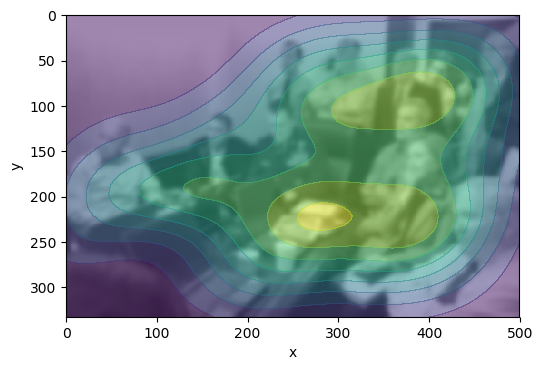

  0%|                                                                                 | 1/1000 [00:00<02:17,  7.27it/s]

Not enough matches are found - 6/10


  0%|▏                                                                                | 2/1000 [00:00<02:30,  6.64it/s]

Not enough matches are found - 7/10


  1%|▋                                                                                | 9/1000 [00:01<02:01,  8.13it/s]

Not enough matches are found - 6/10


  1%|▉                                                                               | 12/1000 [00:01<01:58,  8.34it/s]

Not enough matches are found - 2/10
Not enough matches are found - 10/10


  2%|█▊                                                                              | 22/1000 [00:02<01:56,  8.38it/s]

Not enough matches are found - 3/10


  3%|██▍                                                                             | 30/1000 [00:03<02:08,  7.57it/s]

Not enough matches are found - 6/10


  4%|███                                                                             | 39/1000 [00:04<01:58,  8.14it/s]

Not enough matches are found - 5/10


  6%|████▋                                                                           | 59/1000 [00:07<02:01,  7.77it/s]

Not enough matches are found - 10/10


  6%|████▊                                                                           | 60/1000 [00:07<01:57,  8.03it/s]

Not enough matches are found - 5/10


  8%|██████▏                                                                         | 77/1000 [00:09<01:47,  8.55it/s]

Not enough matches are found - 10/10


  9%|███████                                                                         | 88/1000 [00:10<01:54,  7.98it/s]

Not enough matches are found - 10/10


 10%|███████▌                                                                        | 95/1000 [00:11<01:48,  8.32it/s]

Not enough matches are found - 8/10


 10%|███████▊                                                                        | 98/1000 [00:12<02:00,  7.46it/s]

Not enough matches are found - 6/10


 10%|███████▉                                                                        | 99/1000 [00:12<02:00,  7.47it/s]

Not enough matches are found - 7/10


 11%|█████████                                                                      | 114/1000 [00:14<01:43,  8.55it/s]

Not enough matches are found - 4/10


 13%|██████████                                                                     | 127/1000 [00:15<01:46,  8.21it/s]

Not enough matches are found - 7/10


 13%|██████████                                                                     | 128/1000 [00:15<01:43,  8.42it/s]

Not enough matches are found - 10/10


 14%|███████████▏                                                                   | 142/1000 [00:17<01:44,  8.20it/s]

Not enough matches are found - 4/10


 15%|███████████▊                                                                   | 150/1000 [00:18<01:52,  7.55it/s]

Not enough matches are found - 9/10


 16%|████████████▍                                                                  | 158/1000 [00:19<01:53,  7.39it/s]

Not enough matches are found - 4/10


 17%|█████████████▎                                                                 | 169/1000 [00:21<01:54,  7.26it/s]

Not enough matches are found - 9/10


 18%|██████████████                                                                 | 178/1000 [00:22<01:49,  7.54it/s]

Not enough matches are found - 6/10


 18%|██████████████▌                                                                | 184/1000 [00:23<01:53,  7.20it/s]

Not enough matches are found - 5/10


 19%|███████████████                                                                | 191/1000 [00:23<01:39,  8.13it/s]

Not enough matches are found - 5/10


 21%|████████████████▍                                                              | 208/1000 [00:26<01:44,  7.57it/s]

Not enough matches are found - 2/10
Not enough matches are found - 4/10


 21%|████████████████▋                                                              | 212/1000 [00:26<01:57,  6.70it/s]

Not enough matches are found - 4/10


 22%|█████████████████▏                                                             | 218/1000 [00:27<01:47,  7.27it/s]

Not enough matches are found - 10/10


 22%|█████████████████▍                                                             | 221/1000 [00:27<01:37,  7.97it/s]

Not enough matches are found - 6/10


 23%|██████████████████                                                             | 229/1000 [00:28<01:25,  9.00it/s]

Not enough matches are found - 9/10


 23%|██████████████████▏                                                            | 231/1000 [00:28<01:25,  8.98it/s]

Not enough matches are found - 8/10


 24%|██████████████████▌                                                            | 235/1000 [00:29<01:29,  8.51it/s]

Not enough matches are found - 6/10


 24%|███████████████████                                                            | 242/1000 [00:30<01:21,  9.28it/s]

Not enough matches are found - 1/10


 25%|███████████████████▌                                                           | 248/1000 [00:30<01:23,  8.96it/s]

Not enough matches are found - 2/10


 25%|███████████████████▊                                                           | 250/1000 [00:31<01:37,  7.70it/s]

Not enough matches are found - 7/10


 25%|███████████████████▉                                                           | 252/1000 [00:31<01:35,  7.87it/s]

Not enough matches are found - 5/10


 26%|████████████████████▍                                                          | 258/1000 [00:32<01:35,  7.81it/s]

Not enough matches are found - 1/10


 26%|████████████████████▌                                                          | 261/1000 [00:32<01:44,  7.10it/s]

Not enough matches are found - 6/10


 28%|██████████████████████▎                                                        | 283/1000 [00:35<01:44,  6.86it/s]

Not enough matches are found - 8/10


 29%|██████████████████████▋                                                        | 287/1000 [00:36<01:36,  7.38it/s]

Not enough matches are found - 5/10


 32%|████████████████████████▉                                                      | 316/1000 [00:39<01:27,  7.85it/s]

Not enough matches are found - 10/10


 32%|█████████████████████████                                                      | 318/1000 [00:39<01:24,  8.11it/s]

Not enough matches are found - 10/10


 32%|█████████████████████████▌                                                     | 324/1000 [00:40<01:31,  7.37it/s]

Not enough matches are found - 2/10


 34%|██████████████████████████▊                                                    | 339/1000 [00:42<01:21,  8.16it/s]

Not enough matches are found - 7/10


 35%|███████████████████████████▍                                                   | 347/1000 [00:43<01:15,  8.68it/s]

Not enough matches are found - 9/10


 36%|████████████████████████████                                                   | 355/1000 [00:44<01:29,  7.22it/s]

Not enough matches are found - 7/10


 37%|█████████████████████████████▏                                                 | 369/1000 [00:46<01:34,  6.67it/s]

Not enough matches are found - 4/10


 37%|█████████████████████████████▎                                                 | 371/1000 [00:47<01:28,  7.14it/s]

Not enough matches are found - 2/10


 37%|█████████████████████████████▍                                                 | 373/1000 [00:47<01:22,  7.58it/s]

Not enough matches are found - 8/10


 38%|██████████████████████████████▎                                                | 384/1000 [00:48<01:25,  7.19it/s]

Not enough matches are found - 6/10


 40%|███████████████████████████████▏                                               | 395/1000 [00:50<01:28,  6.87it/s]

Not enough matches are found - 10/10


 40%|███████████████████████████████▎                                               | 396/1000 [00:50<01:32,  6.56it/s]

Not enough matches are found - 6/10


 40%|███████████████████████████████▎                                               | 397/1000 [00:50<01:29,  6.77it/s]

Not enough matches are found - 6/10


 40%|███████████████████████████████▌                                               | 400/1000 [00:51<01:18,  7.61it/s]

Not enough matches are found - 7/10


 40%|███████████████████████████████▊                                               | 402/1000 [00:51<01:21,  7.38it/s]

Not enough matches are found - 6/10


 41%|████████████████████████████████▏                                              | 407/1000 [00:52<01:24,  7.01it/s]

Not enough matches are found - 6/10


 42%|█████████████████████████████████▎                                             | 422/1000 [00:54<01:31,  6.35it/s]

Not enough matches are found - 9/10


 43%|█████████████████████████████████▊                                             | 428/1000 [00:55<01:29,  6.41it/s]

Not enough matches are found - 5/10


 44%|██████████████████████████████████▊                                            | 441/1000 [00:57<01:26,  6.48it/s]

Not enough matches are found - 10/10


 46%|████████████████████████████████████▍                                          | 462/1000 [00:59<01:25,  6.28it/s]

Not enough matches are found - 2/10


 48%|█████████████████████████████████████▉                                         | 480/1000 [01:02<01:16,  6.78it/s]

Not enough matches are found - 5/10


 49%|██████████████████████████████████████▍                                        | 486/1000 [01:03<01:12,  7.09it/s]

Not enough matches are found - 5/10


 49%|██████████████████████████████████████▋                                        | 489/1000 [01:03<01:14,  6.86it/s]

Not enough matches are found - 7/10


 49%|██████████████████████████████████████▊                                        | 491/1000 [01:04<01:12,  6.99it/s]

Not enough matches are found - 6/10


 50%|███████████████████████████████████████▎                                       | 498/1000 [01:04<01:05,  7.69it/s]

Not enough matches are found - 5/10


 51%|███████████████████████████████████████▉                                       | 506/1000 [01:06<01:11,  6.95it/s]

Not enough matches are found - 2/10


 51%|████████████████████████████████████████                                       | 507/1000 [01:06<01:10,  6.96it/s]

Not enough matches are found - 8/10


 51%|████████████████████████████████████████▏                                      | 508/1000 [01:06<01:13,  6.66it/s]

Not enough matches are found - 6/10


 51%|████████████████████████████████████████▎                                      | 511/1000 [01:06<01:11,  6.84it/s]

Not enough matches are found - 5/10


 53%|█████████████████████████████████████████▊                                     | 529/1000 [01:09<01:04,  7.33it/s]

Not enough matches are found - 4/10


 53%|██████████████████████████████████████████                                     | 533/1000 [01:09<01:02,  7.49it/s]

Not enough matches are found - 4/10


 54%|██████████████████████████████████████████▉                                    | 543/1000 [01:11<01:01,  7.40it/s]

Not enough matches are found - 5/10


 55%|███████████████████████████████████████████▋                                   | 553/1000 [01:12<01:03,  7.09it/s]

Not enough matches are found - 5/10


 56%|███████████████████████████████████████████▉                                   | 556/1000 [01:12<00:57,  7.68it/s]

Not enough matches are found - 1/10


 57%|████████████████████████████████████████████▊                                  | 567/1000 [01:14<01:01,  7.06it/s]

Not enough matches are found - 2/10


 57%|█████████████████████████████████████████████▏                                 | 572/1000 [01:14<00:58,  7.36it/s]

Not enough matches are found - 6/10


 57%|█████████████████████████████████████████████▍                                 | 575/1000 [01:15<00:50,  8.35it/s]

Not enough matches are found - 1/10


 60%|███████████████████████████████████████████████▍                               | 601/1000 [01:18<00:48,  8.24it/s]

Not enough matches are found - 3/10


 62%|█████████████████████████████████████████████████                              | 621/1000 [01:20<00:46,  8.07it/s]

Not enough matches are found - 10/10


 63%|█████████████████████████████████████████████████▋                             | 629/1000 [01:21<00:49,  7.43it/s]

Not enough matches are found - 2/10


 64%|██████████████████████████████████████████████████▌                            | 640/1000 [01:23<00:48,  7.45it/s]

Not enough matches are found - 7/10


 64%|██████████████████████████████████████████████████▋                            | 641/1000 [01:23<00:44,  8.00it/s]

Not enough matches are found - 9/10


 65%|███████████████████████████████████████████████████▏                           | 648/1000 [01:24<00:44,  7.98it/s]

Not enough matches are found - 9/10


 68%|█████████████████████████████████████████████████████▎                         | 675/1000 [01:27<00:43,  7.54it/s]

Not enough matches are found - 5/10


 68%|█████████████████████████████████████████████████████▍                         | 676/1000 [01:27<00:40,  8.09it/s]

Not enough matches are found - 10/10


 69%|██████████████████████████████████████████████████████▋                        | 692/1000 [01:29<00:38,  7.97it/s]

Not enough matches are found - 8/10


 69%|██████████████████████████████████████████████████████▊                        | 694/1000 [01:30<00:36,  8.50it/s]

Not enough matches are found - 10/10
Not enough matches are found - 7/10


 70%|███████████████████████████████████████████████████████▍                       | 701/1000 [01:30<00:36,  8.12it/s]

Not enough matches are found - 5/10


 71%|███████████████████████████████████████████████████████▊                       | 706/1000 [01:31<00:38,  7.55it/s]

Not enough matches are found - 4/10


 72%|████████████████████████████████████████████████████████▍                      | 715/1000 [01:32<00:40,  7.12it/s]

Not enough matches are found - 9/10


 75%|███████████████████████████████████████████████████████████                    | 747/1000 [01:36<00:37,  6.71it/s]

Not enough matches are found - 5/10


 75%|███████████████████████████████████████████████████████████▎                   | 750/1000 [01:37<00:33,  7.46it/s]

Not enough matches are found - 2/10


 76%|███████████████████████████████████████████████████████████▊                   | 757/1000 [01:38<00:32,  7.51it/s]

Not enough matches are found - 7/10


 76%|████████████████████████████████████████████████████████████                   | 760/1000 [01:38<00:31,  7.71it/s]

Not enough matches are found - 7/10
Not enough matches are found - 10/10


 78%|█████████████████████████████████████████████████████████████▎                 | 776/1000 [01:40<00:26,  8.41it/s]

Not enough matches are found - 7/10


 78%|█████████████████████████████████████████████████████████████▌                 | 780/1000 [01:40<00:23,  9.17it/s]

Not enough matches are found - 3/10


 81%|███████████████████████████████████████████████████████████████▊               | 808/1000 [01:44<00:24,  7.69it/s]

Not enough matches are found - 2/10


 83%|█████████████████████████████████████████████████████████████████▋             | 831/1000 [01:47<00:19,  8.83it/s]

Not enough matches are found - 1/10


 84%|██████████████████████████████████████████████████████████████████▎            | 840/1000 [01:48<00:17,  9.19it/s]

Not enough matches are found - 7/10


 84%|██████████████████████████████████████████████████████████████████▍            | 841/1000 [01:48<00:17,  9.24it/s]

Not enough matches are found - 5/10


 85%|███████████████████████████████████████████████████████████████████▏           | 850/1000 [01:49<00:20,  7.43it/s]

Not enough matches are found - 1/10


 86%|███████████████████████████████████████████████████████████████████▊           | 858/1000 [01:50<00:19,  7.39it/s]

Not enough matches are found - 2/10


 87%|████████████████████████████████████████████████████████████████████▍          | 866/1000 [01:51<00:16,  8.18it/s]

Not enough matches are found - 5/10


 87%|████████████████████████████████████████████████████████████████████▌          | 868/1000 [01:51<00:15,  8.69it/s]

Not enough matches are found - 10/10


 87%|████████████████████████████████████████████████████████████████████▋          | 869/1000 [01:51<00:15,  8.40it/s]

Not enough matches are found - 2/10


 87%|████████████████████████████████████████████████████████████████████▋          | 870/1000 [01:52<00:15,  8.20it/s]

Not enough matches are found - 5/10


 87%|████████████████████████████████████████████████████████████████████▉          | 872/1000 [01:52<00:17,  7.46it/s]

Not enough matches are found - 8/10


 89%|██████████████████████████████████████████████████████████████████████▎        | 890/1000 [01:54<00:14,  7.47it/s]

Not enough matches are found - 2/10


 90%|██████████████████████████████████████████████████████████████████████▊        | 896/1000 [01:55<00:12,  8.35it/s]

Not enough matches are found - 9/10


 90%|███████████████████████████████████████████████████████████████████████        | 899/1000 [01:55<00:13,  7.45it/s]

Not enough matches are found - 9/10


 90%|███████████████████████████████████████████████████████████████████████        | 900/1000 [01:55<00:13,  7.26it/s]

Not enough matches are found - 6/10


 90%|███████████████████████████████████████████████████████████████████████▏       | 901/1000 [01:56<00:14,  6.67it/s]

Not enough matches are found - 8/10


 91%|███████████████████████████████████████████████████████████████████████▋       | 907/1000 [01:56<00:11,  8.21it/s]

Not enough matches are found - 10/10


 91%|███████████████████████████████████████████████████████████████████████▉       | 910/1000 [01:57<00:11,  7.90it/s]

Not enough matches are found - 2/10


 91%|████████████████████████████████████████████████████████████████████████▏      | 914/1000 [01:57<00:10,  7.89it/s]

Not enough matches are found - 4/10


 93%|█████████████████████████████████████████████████████████████████████████▏     | 927/1000 [01:59<00:10,  7.17it/s]

Not enough matches are found - 8/10


 94%|█████████████████████████████████████████████████████████████████████████▊     | 935/1000 [02:00<00:08,  7.63it/s]

Not enough matches are found - 4/10


 94%|██████████████████████████████████████████████████████████████████████████▌    | 944/1000 [02:01<00:07,  7.95it/s]

Not enough matches are found - 2/10
Not enough matches are found - 5/10


 97%|████████████████████████████████████████████████████████████████████████████▌  | 969/1000 [02:04<00:03,  7.87it/s]

Not enough matches are found - 9/10


 98%|█████████████████████████████████████████████████████████████████████████████  | 975/1000 [02:05<00:03,  6.86it/s]

Not enough matches are found - 10/10


100%|██████████████████████████████████████████████████████████████████████████████▌| 995/1000 [02:07<00:00,  8.96it/s]

Not enough matches are found - 7/10


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:08<00:00,  8.42it/s]


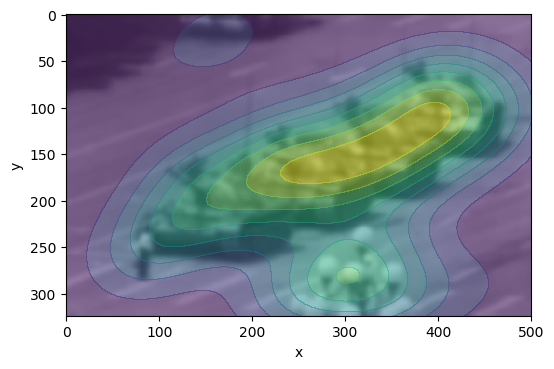

  1%|▋                                                                                | 9/1000 [00:00<01:51,  8.92it/s]

Not enough matches are found - 8/10


  2%|█▉                                                                              | 24/1000 [00:02<01:48,  8.97it/s]

Not enough matches are found - 2/10


  5%|████                                                                            | 51/1000 [00:05<01:45,  9.04it/s]

Not enough matches are found - 4/10


  6%|████▋                                                                           | 59/1000 [00:06<01:51,  8.47it/s]

Not enough matches are found - 3/10


  7%|█████▌                                                                          | 69/1000 [00:07<01:35,  9.71it/s]

Not enough matches are found - 2/10


  8%|██████▏                                                                         | 77/1000 [00:08<01:32,  9.98it/s]

Not enough matches are found - 3/10


  9%|███████                                                                         | 88/1000 [00:09<01:26, 10.58it/s]

Not enough matches are found - 8/10


  9%|███████▏                                                                        | 90/1000 [00:09<01:17, 11.81it/s]

Not enough matches are found - 7/10


  9%|███████▌                                                                        | 94/1000 [00:09<01:21, 11.07it/s]

Not enough matches are found - 9/10


 10%|████████                                                                       | 102/1000 [00:10<01:28, 10.15it/s]

Not enough matches are found - 8/10


 12%|█████████▏                                                                     | 116/1000 [00:11<01:19, 11.12it/s]

Not enough matches are found - 8/10


 13%|██████████▎                                                                    | 130/1000 [00:12<01:20, 10.76it/s]

Not enough matches are found - 10/10


 13%|██████████▌                                                                    | 134/1000 [00:13<01:22, 10.46it/s]

Not enough matches are found - 3/10


 16%|████████████▋                                                                  | 160/1000 [00:16<01:24,  9.92it/s]

Not enough matches are found - 2/10


 17%|█████████████                                                                  | 166/1000 [00:16<01:23, 10.04it/s]

Not enough matches are found - 2/10


 18%|██████████████▏                                                                | 180/1000 [00:17<01:26,  9.48it/s]

Not enough matches are found - 3/10


 22%|████████████████▉                                                              | 215/1000 [00:21<01:18, 10.06it/s]

Not enough matches are found - 10/10


 23%|█████████████████▊                                                             | 226/1000 [00:22<01:12, 10.72it/s]

Not enough matches are found - 3/10


 23%|██████████████████▍                                                            | 234/1000 [00:23<01:09, 11.05it/s]

Not enough matches are found - 10/10


 24%|██████████████████▊                                                            | 238/1000 [00:23<01:16,  9.98it/s]

Not enough matches are found - 5/10


 24%|███████████████████▏                                                           | 243/1000 [00:24<01:20,  9.42it/s]

Not enough matches are found - 8/10


 26%|████████████████████▏                                                          | 256/1000 [00:25<01:29,  8.36it/s]

Not enough matches are found - 2/10


 29%|██████████████████████▋                                                        | 287/1000 [00:28<01:20,  8.91it/s]

Not enough matches are found - 9/10


 30%|███████████████████████▍                                                       | 297/1000 [00:30<01:20,  8.74it/s]

Not enough matches are found - 5/10


 31%|████████████████████████▌                                                      | 311/1000 [00:31<01:07, 10.15it/s]

Not enough matches are found - 5/10


 32%|█████████████████████████▎                                                     | 321/1000 [00:32<01:05, 10.35it/s]

Not enough matches are found - 7/10


 34%|███████████████████████████                                                    | 343/1000 [00:34<01:12,  9.02it/s]

Not enough matches are found - 9/10


 35%|███████████████████████████▋                                                   | 351/1000 [00:35<01:12,  8.92it/s]

Not enough matches are found - 4/10


 37%|█████████████████████████████▍                                                 | 372/1000 [00:37<01:07,  9.30it/s]

Not enough matches are found - 7/10


 38%|██████████████████████████████                                                 | 380/1000 [00:38<01:03,  9.83it/s]

Not enough matches are found - 5/10


 39%|██████████████████████████████▋                                                | 388/1000 [00:39<01:05,  9.31it/s]

Not enough matches are found - 4/10


 40%|███████████████████████████████▌                                               | 399/1000 [00:40<01:07,  8.86it/s]

Not enough matches are found - 5/10


 41%|████████████████████████████████                                               | 406/1000 [00:41<01:05,  9.13it/s]

Not enough matches are found - 8/10


 41%|████████████████████████████████▍                                              | 410/1000 [00:41<01:03,  9.33it/s]

Not enough matches are found - 9/10


 41%|████████████████████████████████▌                                              | 412/1000 [00:42<01:27,  6.68it/s]

Not enough matches are found - 5/10
Not enough matches are found - 7/10


 42%|█████████████████████████████████▎                                             | 422/1000 [00:43<01:03,  9.10it/s]

Not enough matches are found - 6/10


 43%|█████████████████████████████████▋                                             | 426/1000 [00:43<01:00,  9.55it/s]

Not enough matches are found - 2/10
Not enough matches are found - 5/10


 43%|██████████████████████████████████▏                                            | 432/1000 [00:44<00:59,  9.50it/s]

Not enough matches are found - 1/10


 44%|██████████████████████████████████▌                                            | 438/1000 [00:44<00:59,  9.50it/s]

Not enough matches are found - 7/10


 45%|███████████████████████████████████▋                                           | 451/1000 [00:46<00:57,  9.59it/s]

Not enough matches are found - 8/10


 47%|████████████████████████████████████▉                                          | 467/1000 [00:47<01:01,  8.65it/s]

Not enough matches are found - 5/10


 48%|██████████████████████████████████████▏                                        | 483/1000 [00:49<00:48, 10.67it/s]

Not enough matches are found - 10/10


 49%|██████████████████████████████████████▉                                        | 493/1000 [00:50<00:49, 10.15it/s]

Not enough matches are found - 7/10


 50%|███████████████████████████████████████▌                                       | 501/1000 [00:51<00:52,  9.54it/s]

Not enough matches are found - 1/10


 50%|███████████████████████████████████████▉                                       | 505/1000 [00:51<00:49, 10.05it/s]

Not enough matches are found - 1/10


 54%|██████████████████████████████████████████▌                                    | 539/1000 [00:55<00:47,  9.79it/s]

Not enough matches are found - 5/10


 54%|██████████████████████████████████████████▋                                    | 541/1000 [00:55<00:44, 10.27it/s]

Not enough matches are found - 7/10


 55%|███████████████████████████████████████████▍                                   | 550/1000 [00:56<00:49,  9.02it/s]

Not enough matches are found - 10/10


 55%|███████████████████████████████████████████▌                                   | 551/1000 [00:56<00:50,  8.95it/s]

Not enough matches are found - 10/10


 56%|████████████████████████████████████████████▍                                  | 562/1000 [00:57<00:45,  9.57it/s]

Not enough matches are found - 4/10


 56%|████████████████████████████████████████████▋                                  | 565/1000 [00:57<00:43,  9.98it/s]

Not enough matches are found - 4/10


 57%|█████████████████████████████████████████████▍                                 | 575/1000 [00:58<00:43,  9.72it/s]

Not enough matches are found - 9/10


 58%|█████████████████████████████████████████████▊                                 | 580/1000 [00:59<00:45,  9.15it/s]

Not enough matches are found - 3/10
Not enough matches are found - 0/10


 58%|██████████████████████████████████████████████▏                                | 584/1000 [00:59<00:39, 10.58it/s]

Not enough matches are found - 4/10


 60%|███████████████████████████████████████████████                                | 595/1000 [01:00<00:45,  8.96it/s]

Not enough matches are found - 4/10


 60%|███████████████████████████████████████████████▎                               | 599/1000 [01:01<00:43,  9.23it/s]

Not enough matches are found - 6/10


 61%|████████████████████████████████████████████████▎                              | 611/1000 [01:02<00:40,  9.59it/s]

Not enough matches are found - 10/10


 63%|█████████████████████████████████████████████████▊                             | 630/1000 [01:04<00:39,  9.46it/s]

Not enough matches are found - 10/10


 63%|█████████████████████████████████████████████████▊                             | 631/1000 [01:04<00:45,  8.13it/s]

Not enough matches are found - 9/10


 64%|██████████████████████████████████████████████████▋                            | 641/1000 [01:05<00:40,  8.93it/s]

Not enough matches are found - 9/10


 65%|███████████████████████████████████████████████████▋                           | 654/1000 [01:07<00:36,  9.45it/s]

Not enough matches are found - 1/10


 66%|████████████████████████████████████████████████████▌                          | 665/1000 [01:08<00:34,  9.62it/s]

Not enough matches are found - 10/10


 67%|████████████████████████████████████████████████████▊                          | 669/1000 [01:08<00:37,  8.77it/s]

Not enough matches are found - 8/10


 67%|█████████████████████████████████████████████████████▏                         | 674/1000 [01:09<00:35,  9.30it/s]

Not enough matches are found - 6/10


 68%|█████████████████████████████████████████████████████▌                         | 678/1000 [01:09<00:35,  9.05it/s]

Not enough matches are found - 5/10


 68%|█████████████████████████████████████████████████████▉                         | 682/1000 [01:10<00:36,  8.81it/s]

Not enough matches are found - 8/10


 70%|███████████████████████████████████████████████████████▌                       | 704/1000 [01:12<00:32,  9.17it/s]

Not enough matches are found - 6/10


 71%|███████████████████████████████████████████████████████▊                       | 707/1000 [01:12<00:38,  7.54it/s]

Not enough matches are found - 7/10


 72%|████████████████████████████████████████████████████████▋                      | 718/1000 [01:14<00:31,  8.88it/s]

Not enough matches are found - 8/10


 72%|█████████████████████████████████████████████████████████                      | 722/1000 [01:14<00:28,  9.80it/s]

Not enough matches are found - 8/10


 73%|█████████████████████████████████████████████████████████▎                     | 726/1000 [01:14<00:28,  9.77it/s]

Not enough matches are found - 0/10


 73%|█████████████████████████████████████████████████████████▌                     | 729/1000 [01:15<00:29,  9.17it/s]

Not enough matches are found - 5/10


 74%|██████████████████████████████████████████████████████████▌                    | 741/1000 [01:16<00:27,  9.36it/s]

Not enough matches are found - 7/10


 75%|███████████████████████████████████████████████████████████▎                   | 751/1000 [01:17<00:25,  9.91it/s]

Not enough matches are found - 10/10


 76%|████████████████████████████████████████████████████████████▎                  | 763/1000 [01:18<00:25,  9.21it/s]

Not enough matches are found - 3/10


 77%|████████████████████████████████████████████████████████████▊                  | 769/1000 [01:19<00:25,  9.24it/s]

Not enough matches are found - 9/10


 81%|███████████████████████████████████████████████████████████████▊               | 807/1000 [01:23<00:18, 10.18it/s]

Not enough matches are found - 10/10


 81%|████████████████████████████████████████████████████████████████▏              | 812/1000 [01:23<00:19,  9.67it/s]

Not enough matches are found - 6/10


 82%|████████████████████████████████████████████████████████████████▌              | 818/1000 [01:24<00:20,  8.93it/s]

Not enough matches are found - 8/10


 82%|████████████████████████████████████████████████████████████████▋              | 819/1000 [01:24<00:19,  9.08it/s]

Not enough matches are found - 7/10


 82%|████████████████████████████████████████████████████████████████▊              | 821/1000 [01:24<00:17, 10.03it/s]

Not enough matches are found - 2/10


 84%|██████████████████████████████████████████████████████████████████▊            | 845/1000 [01:27<00:15, 10.25it/s]

Not enough matches are found - 7/10


 85%|██████████████████████████████████████████████████████████████████▉            | 847/1000 [01:27<00:15,  9.97it/s]

Not enough matches are found - 4/10


 85%|███████████████████████████████████████████████████████████████████▏           | 851/1000 [01:28<00:15,  9.34it/s]

Not enough matches are found - 7/10


 86%|███████████████████████████████████████████████████████████████████▋           | 857/1000 [01:28<00:18,  7.53it/s]

Not enough matches are found - 4/10


 87%|████████████████████████████████████████████████████████████████████▍          | 866/1000 [01:29<00:14,  8.99it/s]

Not enough matches are found - 9/10


 87%|████████████████████████████████████████████████████████████████████▌          | 868/1000 [01:29<00:13,  9.75it/s]

Not enough matches are found - 0/10


 93%|█████████████████████████████████████████████████████████████████████████▏     | 927/1000 [01:36<00:07, 10.11it/s]

Not enough matches are found - 3/10


 96%|████████████████████████████████████████████████████████████████████████████   | 963/1000 [01:39<00:04,  9.16it/s]

Not enough matches are found - 5/10


 96%|████████████████████████████████████████████████████████████████████████████▏  | 964/1000 [01:39<00:03,  9.17it/s]

Not enough matches are found - 8/10


 97%|████████████████████████████████████████████████████████████████████████████▊  | 973/1000 [01:40<00:02, 10.03it/s]

Not enough matches are found - 4/10


 98%|█████████████████████████████████████████████████████████████████████████████▏ | 977/1000 [01:41<00:02,  9.87it/s]

Not enough matches are found - 9/10


 98%|█████████████████████████████████████████████████████████████████████████████▎ | 979/1000 [01:41<00:02,  9.86it/s]

Not enough matches are found - 4/10


 98%|█████████████████████████████████████████████████████████████████████████████▋ | 983/1000 [01:41<00:01,  9.74it/s]

Not enough matches are found - 7/10
Not enough matches are found - 9/10


 98%|█████████████████████████████████████████████████████████████████████████████▊ | 985/1000 [01:41<00:01, 11.19it/s]

Not enough matches are found - 7/10


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:43<00:00,  9.30it/s]


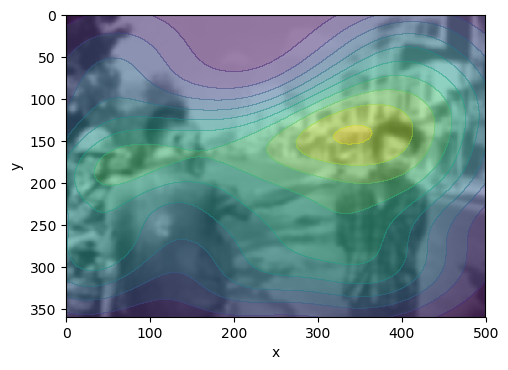

In [11]:
for photo in "Rwanda SharbatGula SpanishSoldier TimesSquareKiss WarRoom TankMan VietCong".split(' '):
    SKPDF(photo,1000)